In [84]:
# tratamiento de los datos
# ============================================
import pandas as pd
import numpy as np
from scipy.stats import skew
import scipy.stats as st
import sidetable
from scipy.stats import chi2_contingency


# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

# Objectives
Description of data, identification of variables to be taken into account for the calculation of health insurance premiums.



---

In [86]:
df = pd.read_csv("../data/00-insurance.csv", index_col = 0).reset_index()
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


## Understand the variables we have and what our dataframe looks like.

In [9]:
# number of rows and columns in the dataframe

df.shape

(1338, 7)

In [10]:
# general data frame information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
# name of the columns of our dataframe

df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Statistics

In [12]:
# leading statistics of the numeric columns.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [13]:
# main statistics of the categorical variables

df.describe(include ="object").T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


Data integrity:
- Smoking habits, majority non-smokers (274 smokers)
- BMI mean 30, overweight (more than 75% over BMI 25)

---

## Null

In [14]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

---

## Duplicates

In [15]:
# duplicados 

df.duplicated().sum()

1

In [16]:
df[df.duplicated()== True] 

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.duplicated().sum()

0

---

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


---

# Outliers

In [20]:
numericas = df.select_dtypes(include=['int64', 'float64'])
numericas.head(2)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523


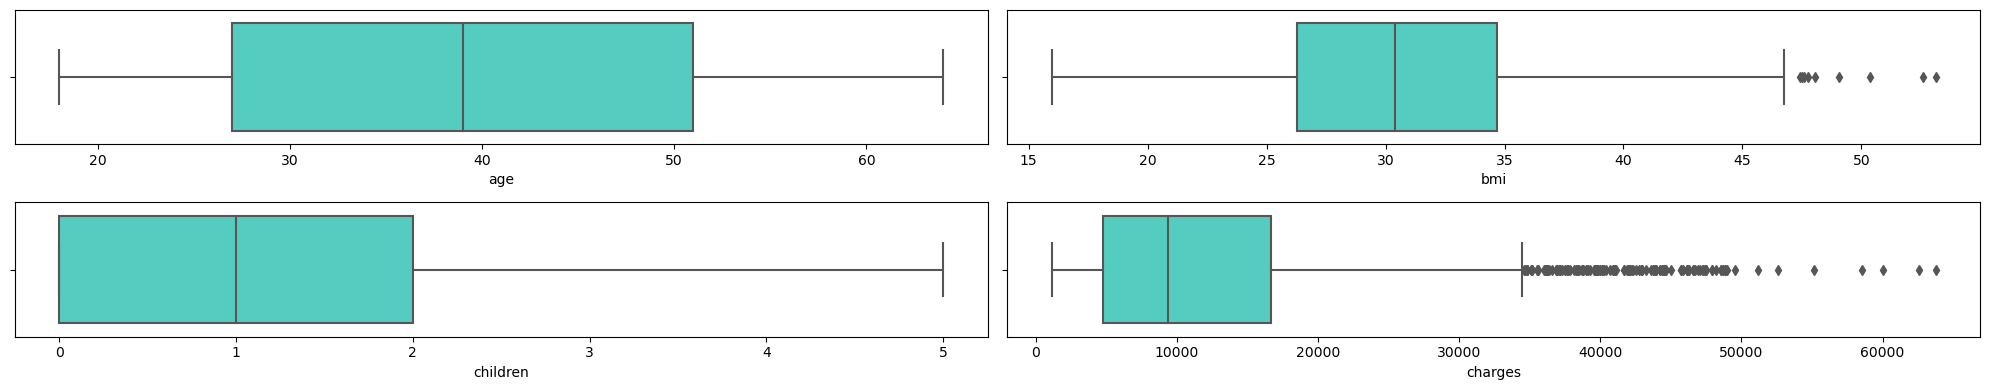

In [77]:
fig, axes = plt.subplots(2,2, figsize=(20,4))
axes = axes.flat
for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "turquoise") 
plt.tight_layout()
plt.show();

In the boxplots we see a lot of outliers, we see the distributions to decide the treatment, I am not going to do anything with them yet, before I see if I unfold the dataset or not.

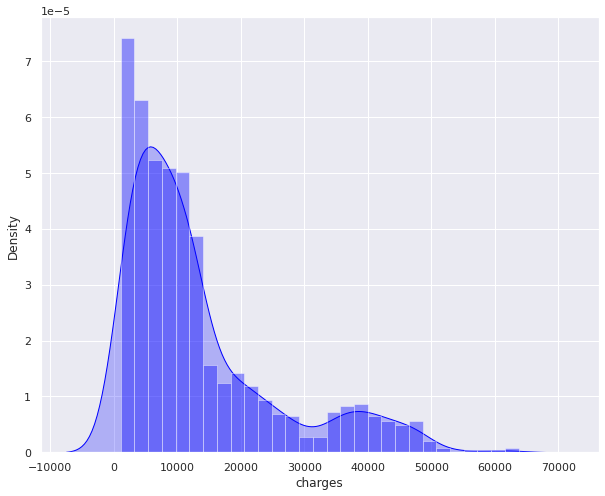

In [108]:
# I'm going to look at the distribution of variable charges
sns.set(style="ticks")
sns.set_style("darkgrid")
sns.distplot(
    df["charges"], 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});


## We analyse the numerical variables of the dataset

### Distributions

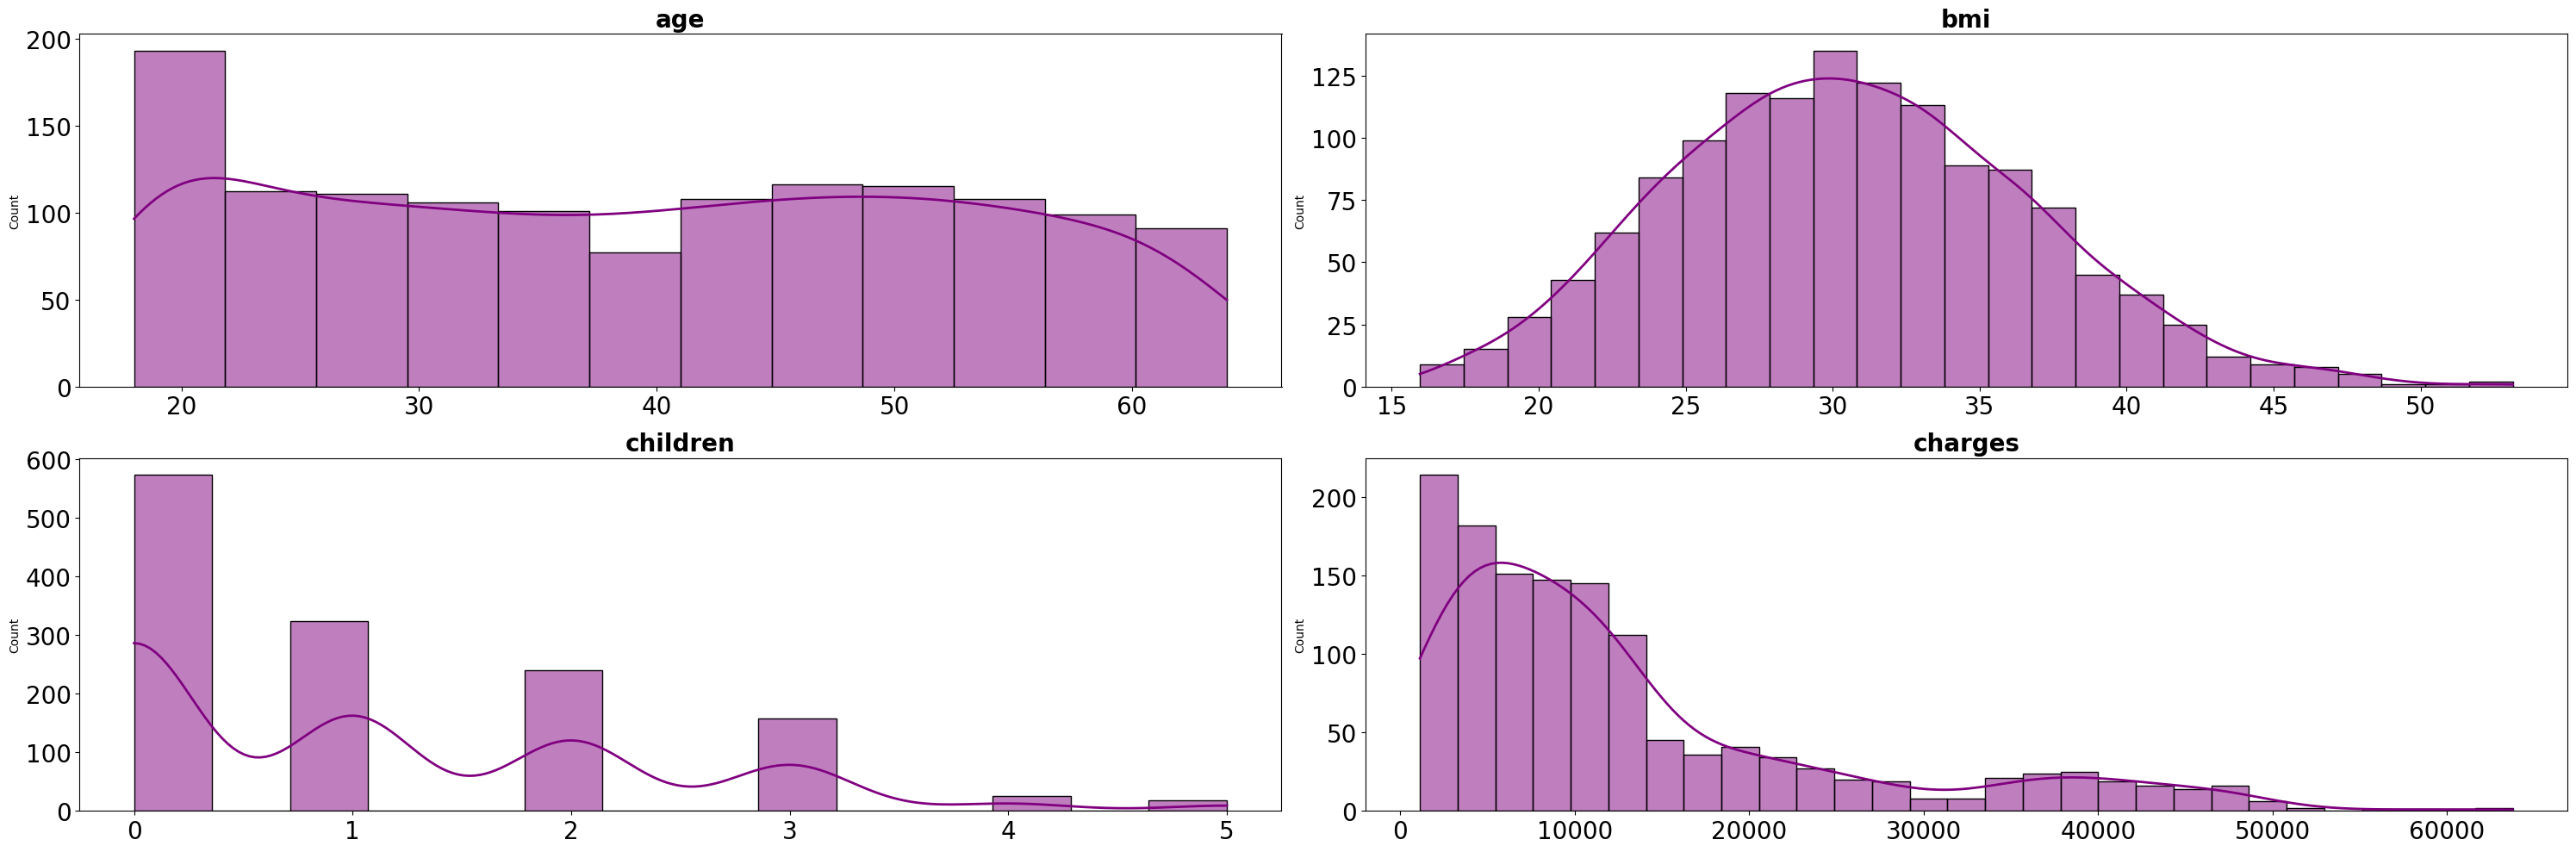

In [78]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))
axes = axes.flat#iterator
for i, colum in enumerate(numericas.columns): 
    sns.histplot(
        data = numericas[colum],
        kde = True,
        color = "purple", 
        line_kws = {"linewidth": 2}, 
        alpha = 0.5, 
        ax = axes[i])
    axes[i].set_title(colum, fontsize = 20, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
fig.tight_layout();

### Relación con la variable respuesta

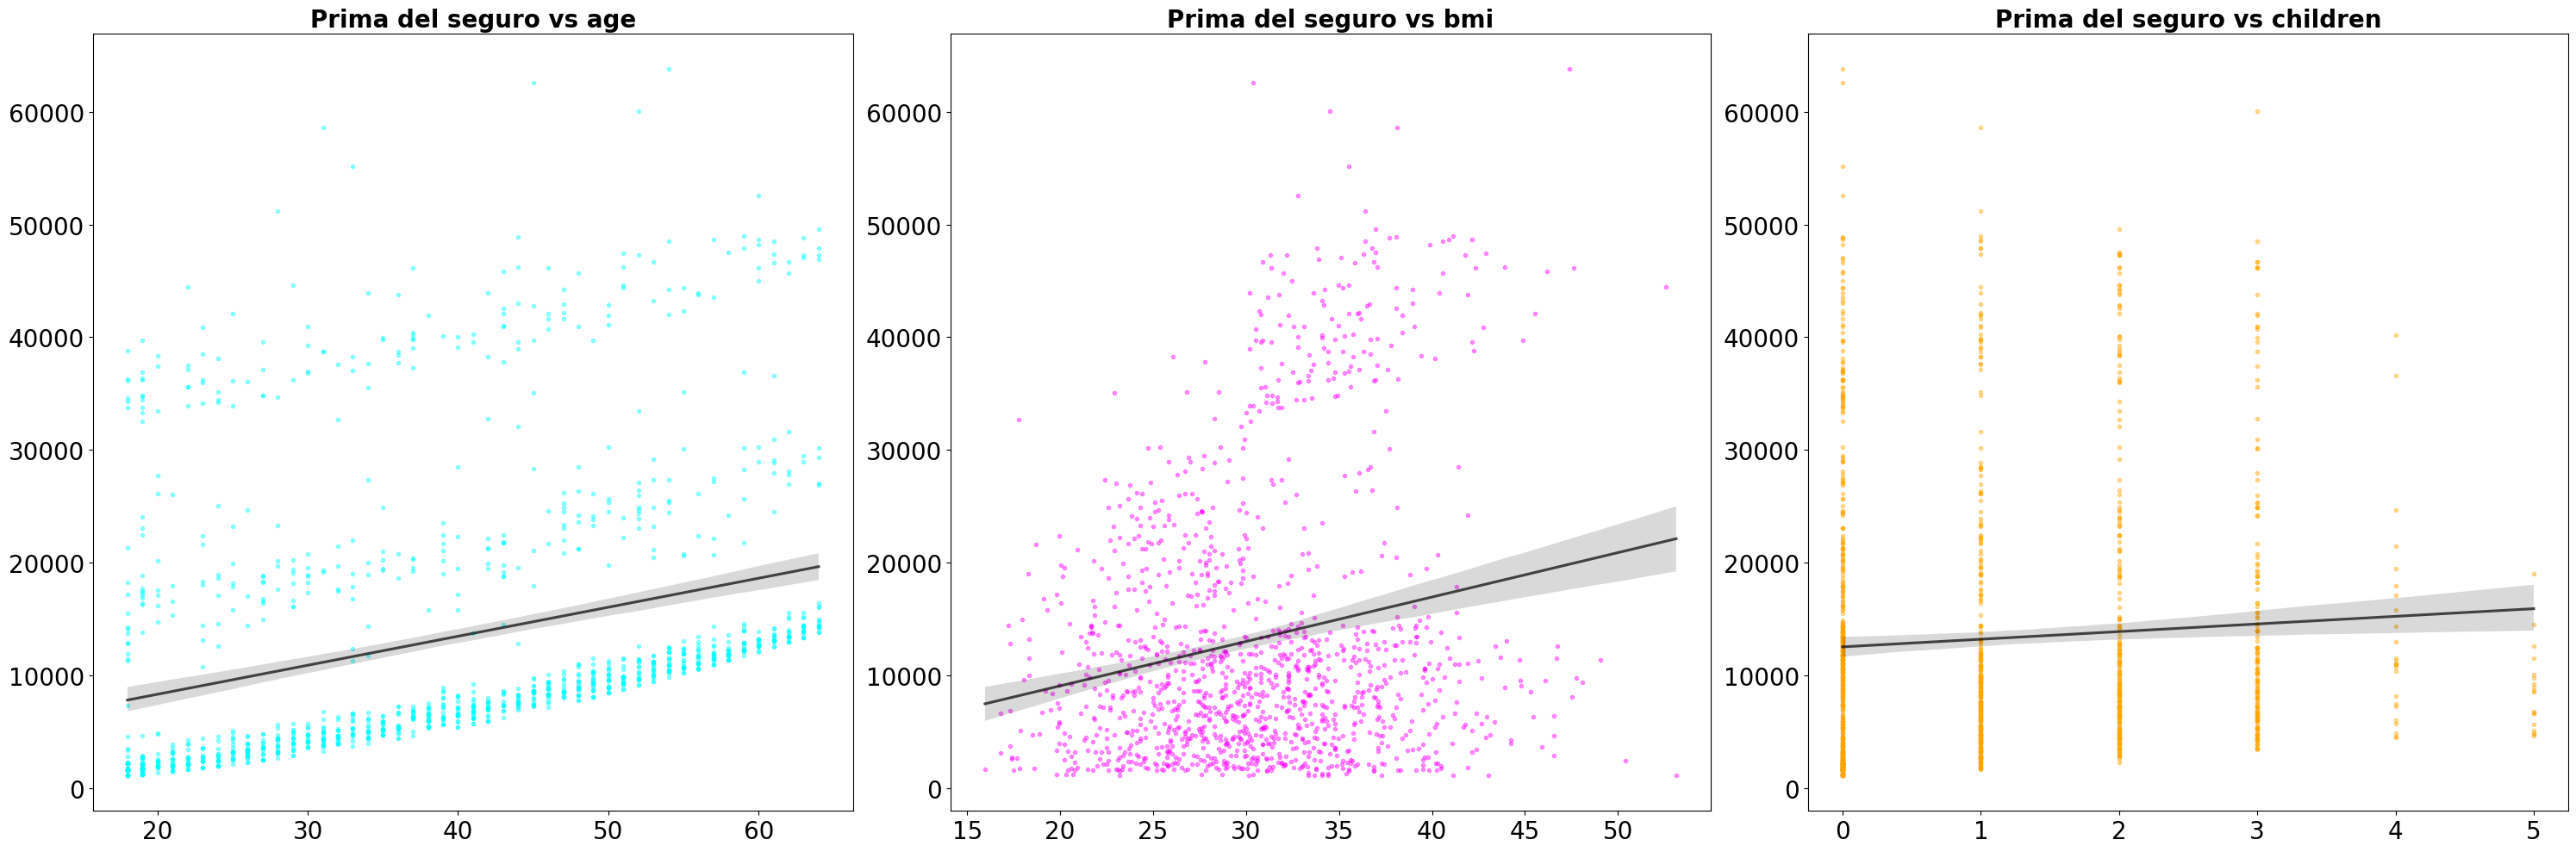

In [55]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))
axes = axes.flat
lista_colores = ["cyan", "magenta", "orange"]

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["charges"], 
        color = lista_colores[i], 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Prima del seguro vs {colum}", fontsize = 20, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();


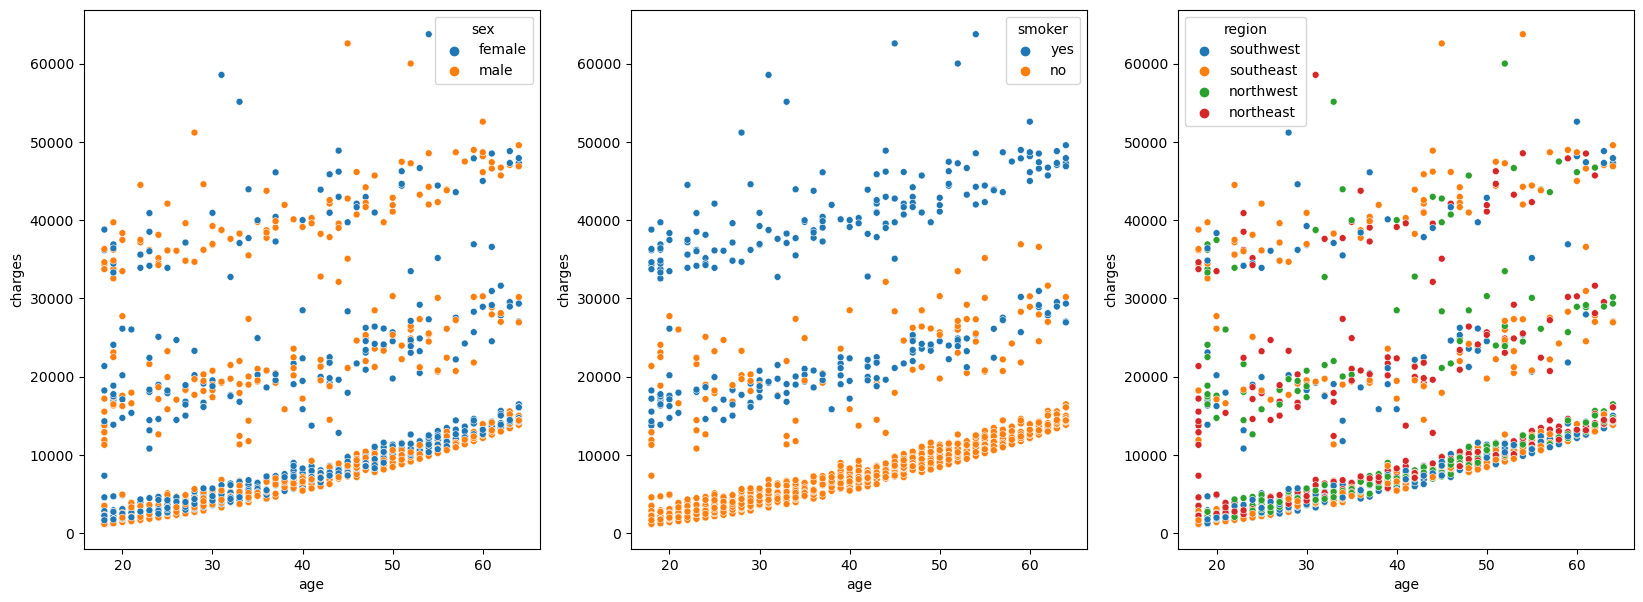

In [95]:
fig, axes = plt.subplots(1, 3, figsize=(20,7))
categoricas=df.select_dtypes(include='object')
for i in range(len(categoricas.columns)): 
    sns.scatterplot(x='age', y='charges', data = df,
                    s = 25,
                    hue = categoricas.columns[i], 
                    ax=axes[i])   
plt.show(); 

Here we see that in age, there are about three clear trend lines in the distribution of our data.  
**-------------------------------------All 3 increase with age and tobacco-------------------------------------**

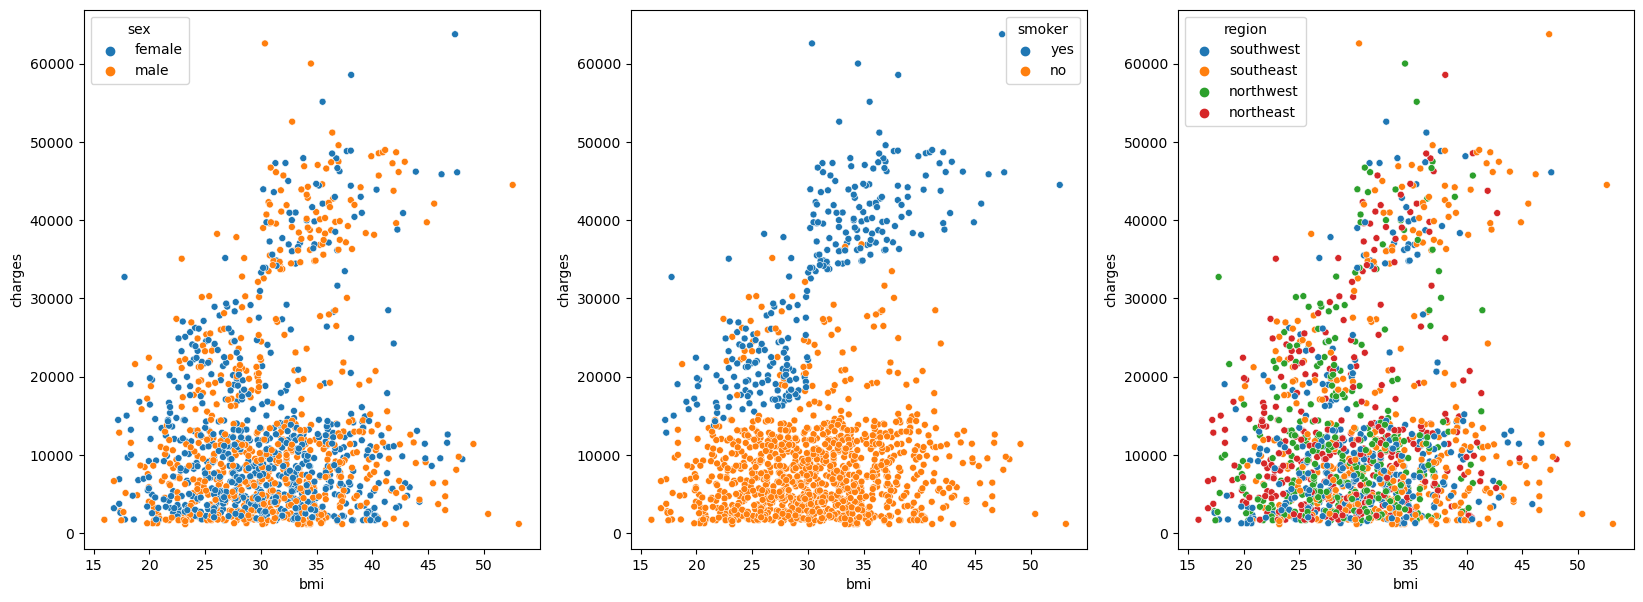

In [97]:
fig, axes = plt.subplots(1, 3, figsize=(20,7))

for i in range(len(categoricas.columns)): 
    sns.scatterplot(x='bmi', y='charges', data = df,
                    s = 25,    
                    hue = categoricas.columns[i], 
                    ax=axes[i])  
plt.show(); 

**-------------------------------We see that there is a clear increase  in charges with tobacco--------------------------**

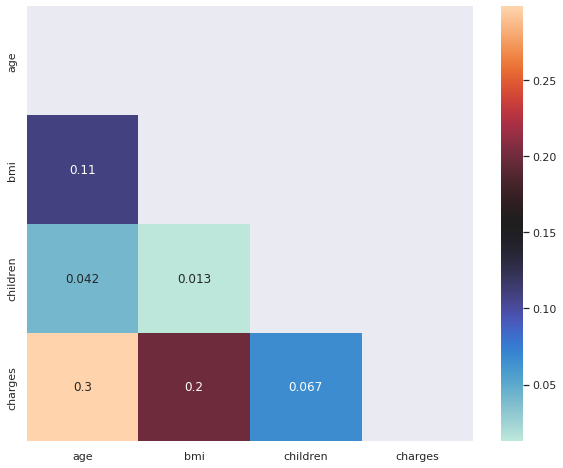

In [111]:
mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))
sns.heatmap(df.corr(), 
           cmap = "icefire", 
            mask = mask,
           annot = True);

### Apparently, the most correlated is age.

## Categorical variables

### I create some graphs to go deeper into the data

### Region

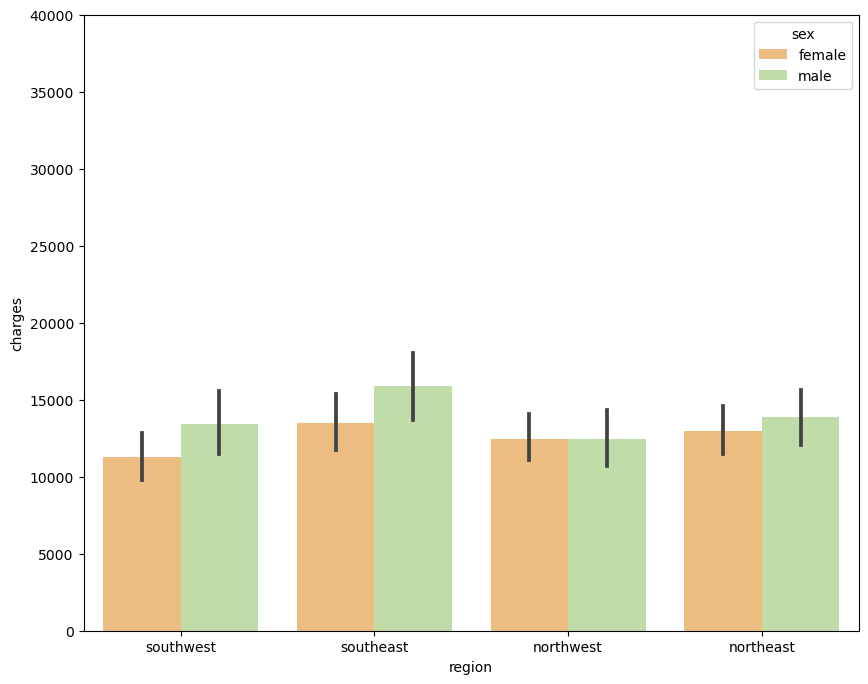

In [59]:
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='Spectral')
plt.ylim(0,40000);

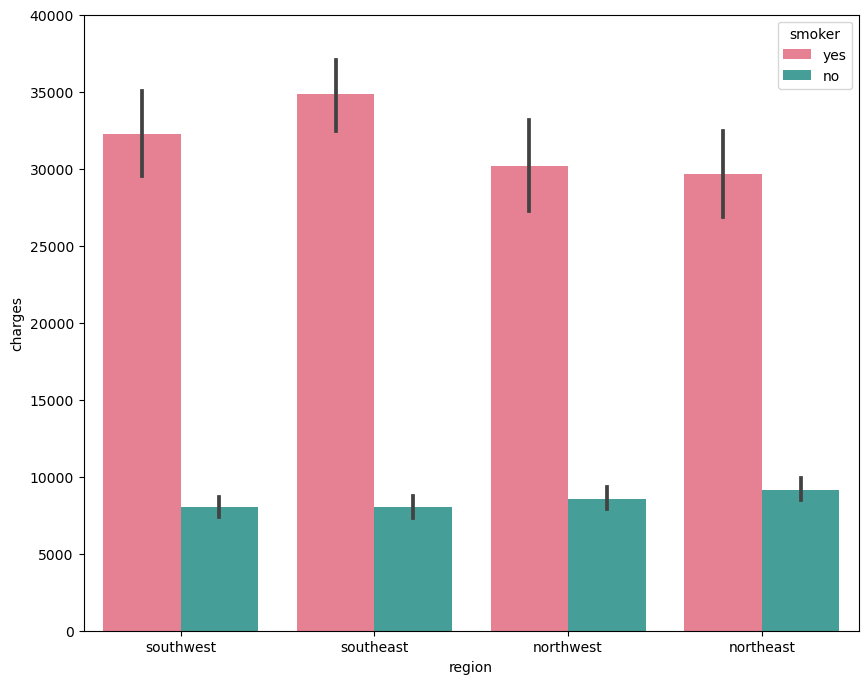

In [60]:
sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='husl')
plt.ylim(0,40000);

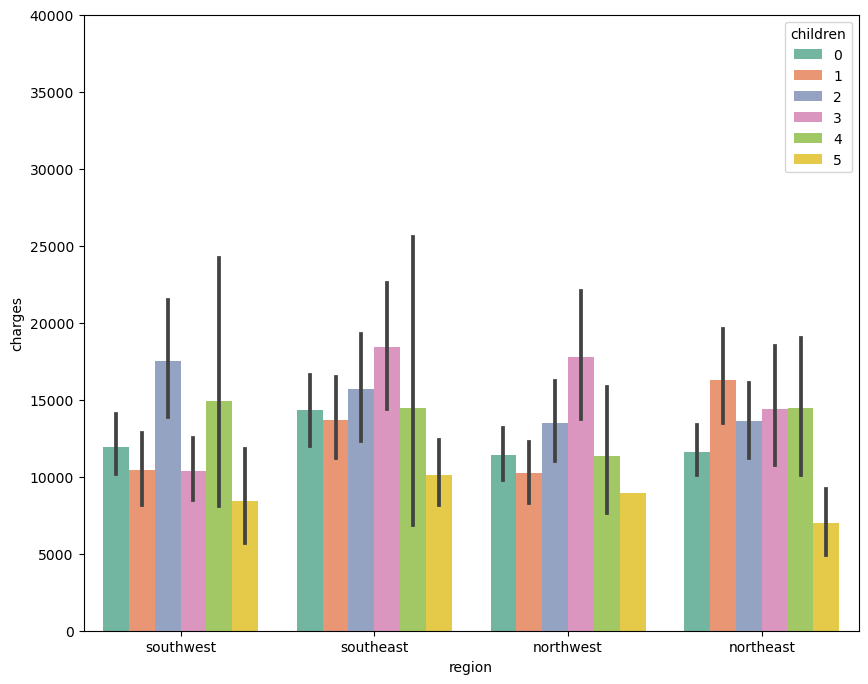

In [61]:
sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set2')
plt.ylim(0,40000);

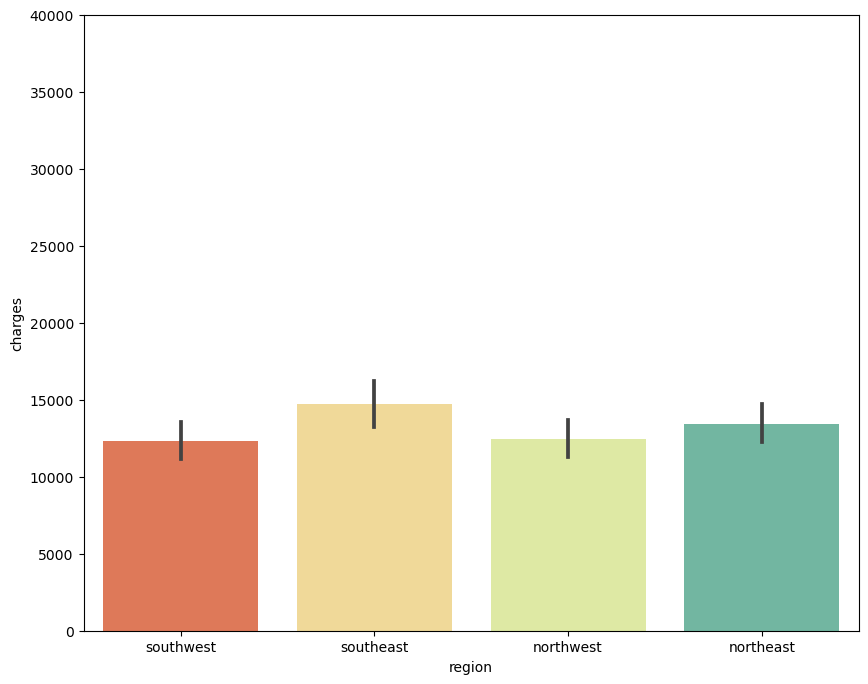

In [62]:
sns.barplot(x='region', y='charges', data=df, palette='Spectral')
plt.ylim(0,40000);

We see that there is a certain relationship between region and premiums, but it is not very pronounced and we do not see too much logic in the relationship at the moment, we already see differences in smoking habits.

In [ ]:
chi2 = chi2_contingency(genero_empresa_mundial)
if chi2[1] <= .05:
    print(f"Existen diferencias significativas en el tipo de puesto según el género, con una p de {round(chi2[1], 2)}")
else:
    print(f"No existen diferencias significativas en el tipo de puesto según el género, con una p de {round(chi2[1], 2)}")

---

### Children

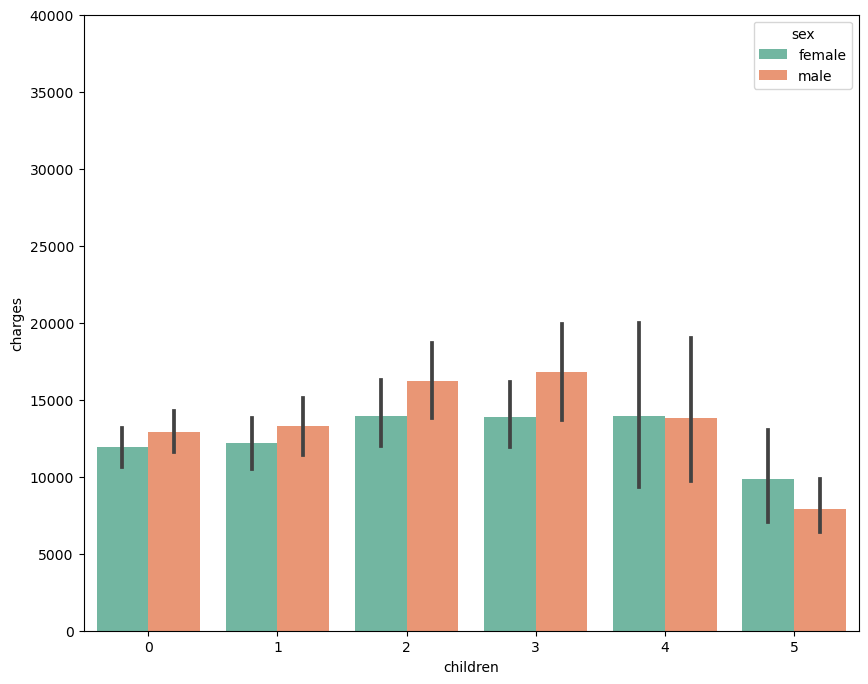

In [63]:
sns.barplot(x='children', y='charges', hue='sex', data=df, palette='Set2')
plt.ylim(0,40000);

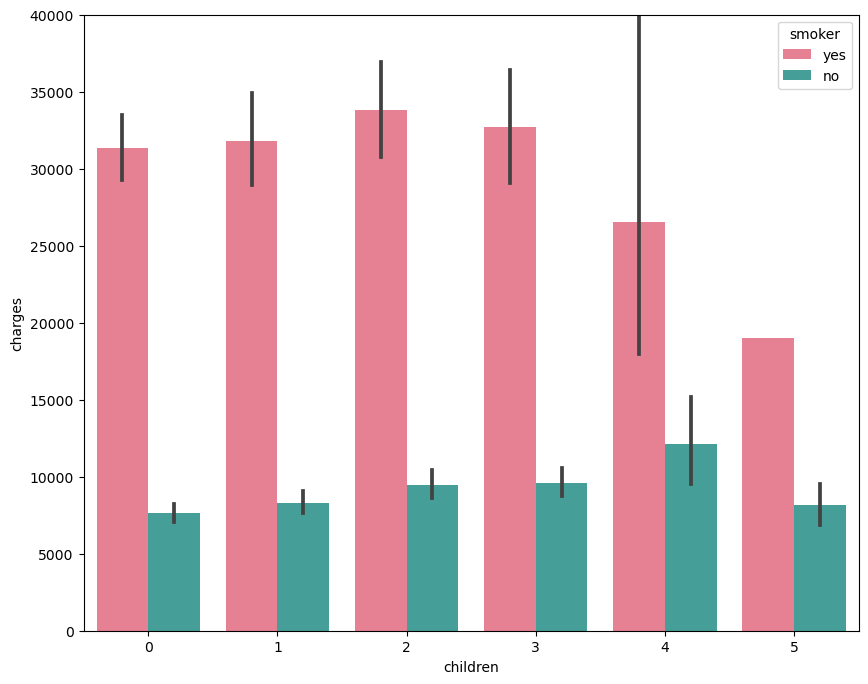

In [64]:
sns.barplot(x = 'children', y = 'charges',
                 hue='smoker', data=df, palette='husl')
plt.ylim(0,40000);

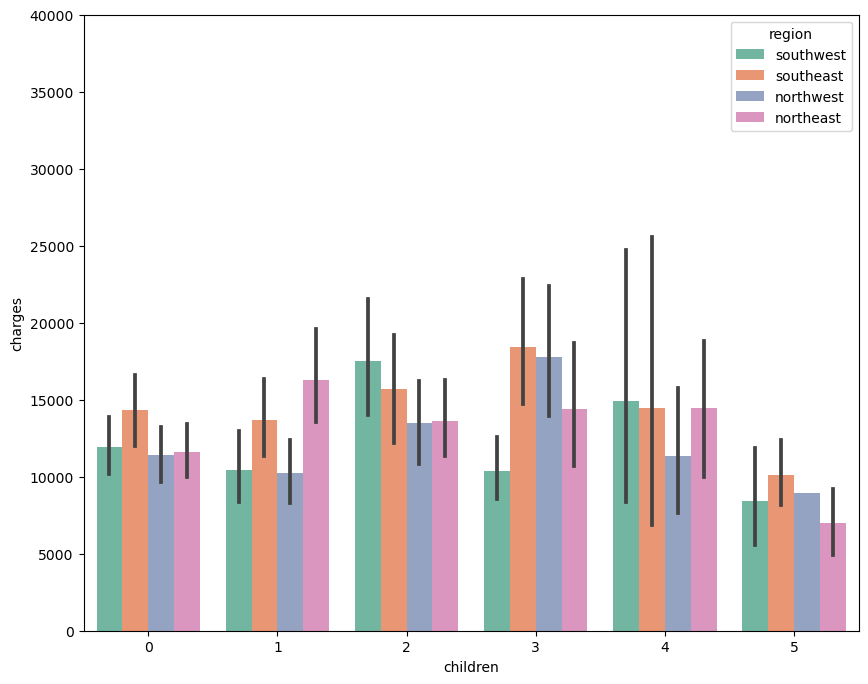

In [65]:
sns.barplot(x='children', y='charges', hue='region', data=df, palette='Set2')
plt.ylim(0,40000);

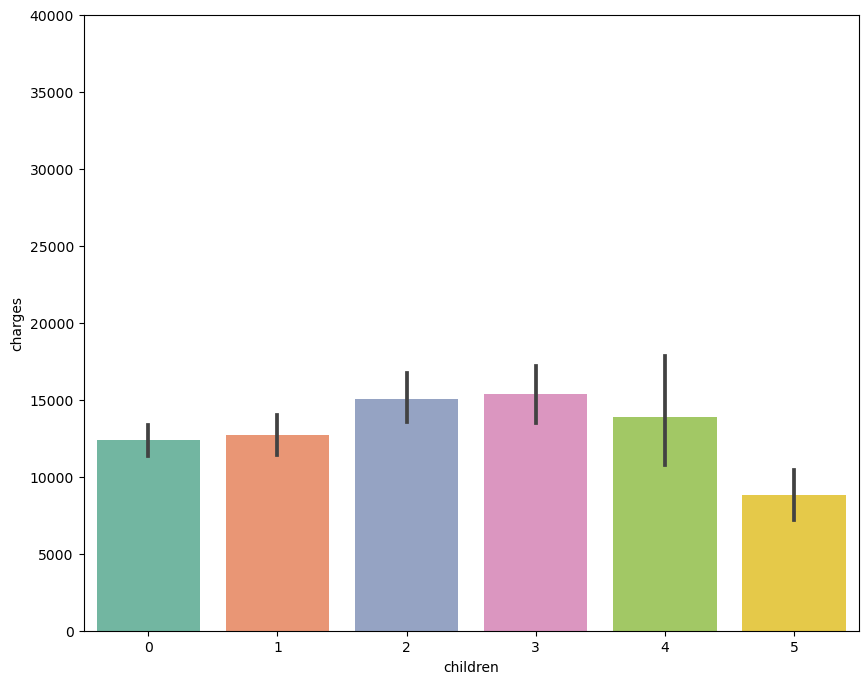

In [66]:
sns.barplot(x='children', y='charges', data=df, palette='Set2')
plt.ylim(0,40000);

We can see that the premiums from 0 to 3 dependents are in increasing order of premiums, but from 3 onwards, they start to decrease, and the relationship is not clear either.

---

### Smoker

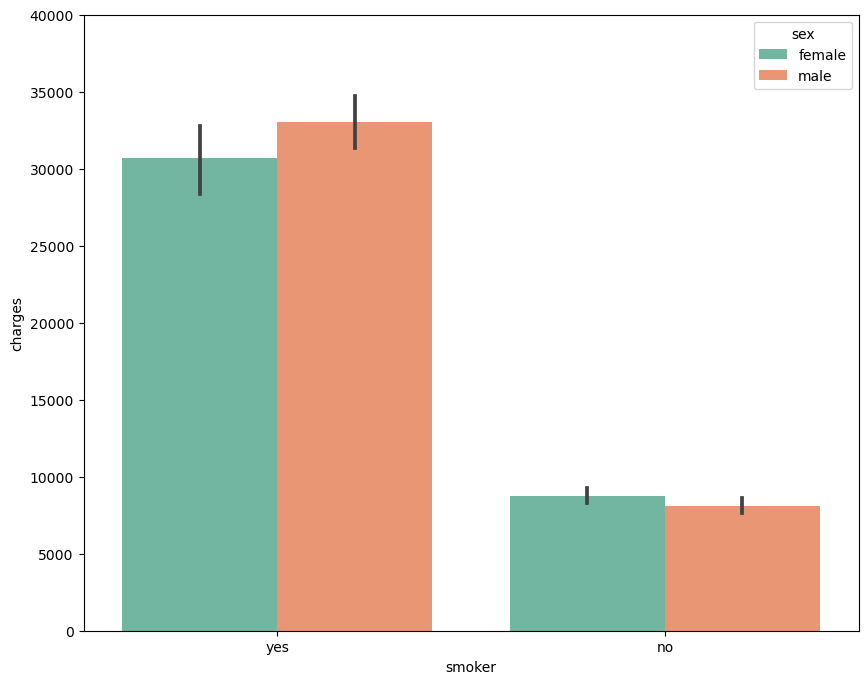

In [67]:
sns.barplot(x='smoker', y='charges', hue='sex', data=df, palette='Set2')
plt.ylim(0,40000);

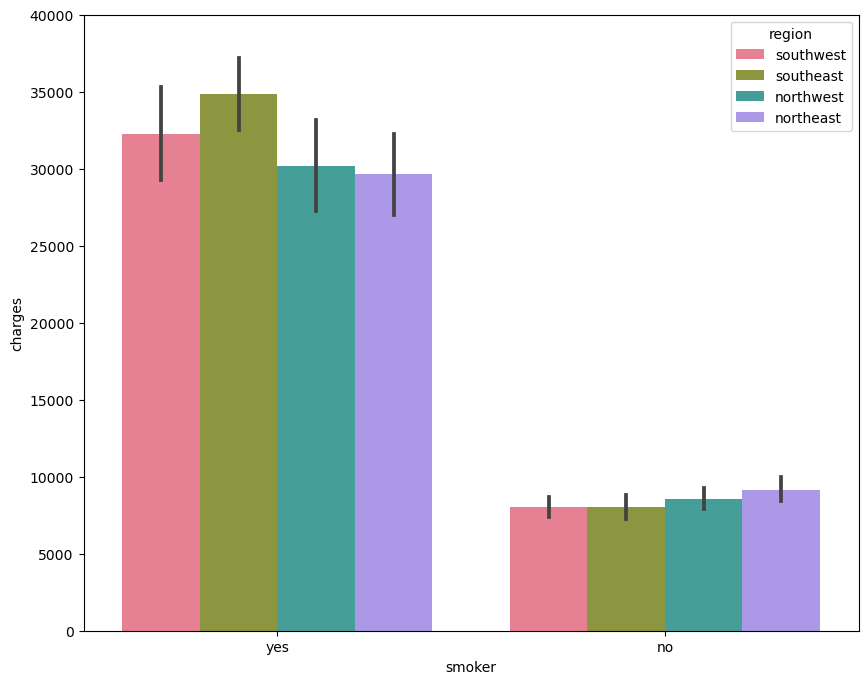

In [68]:
sns.barplot(x = 'smoker', y = 'charges',
                 hue='region', data=df, palette='husl')
plt.ylim(0,40000);

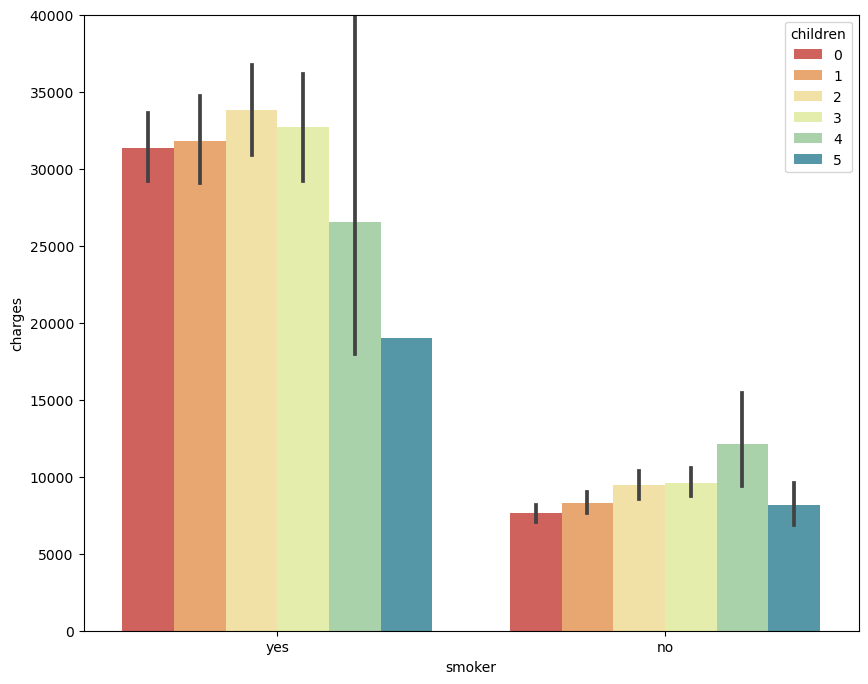

In [69]:
sns.barplot(x='smoker', y='charges', hue='children', data=df, palette='Spectral')
plt.ylim(0,40000);

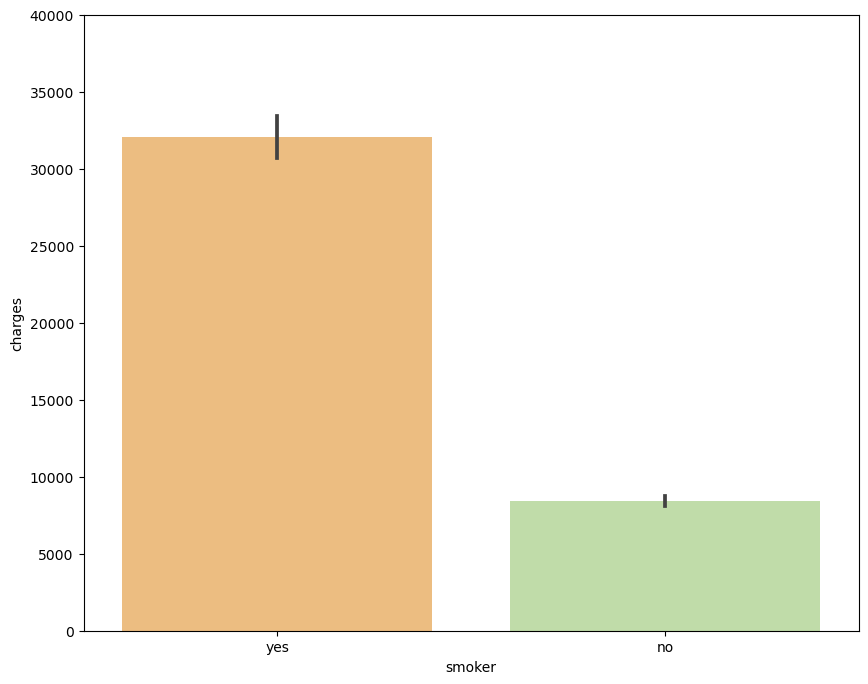

In [70]:
sns.barplot(x='smoker', y='charges', data=df, palette='Spectral')
plt.ylim(0,40000);

We see a fairly clear relationship with smoking habits and the amount of premiums.

### Sex

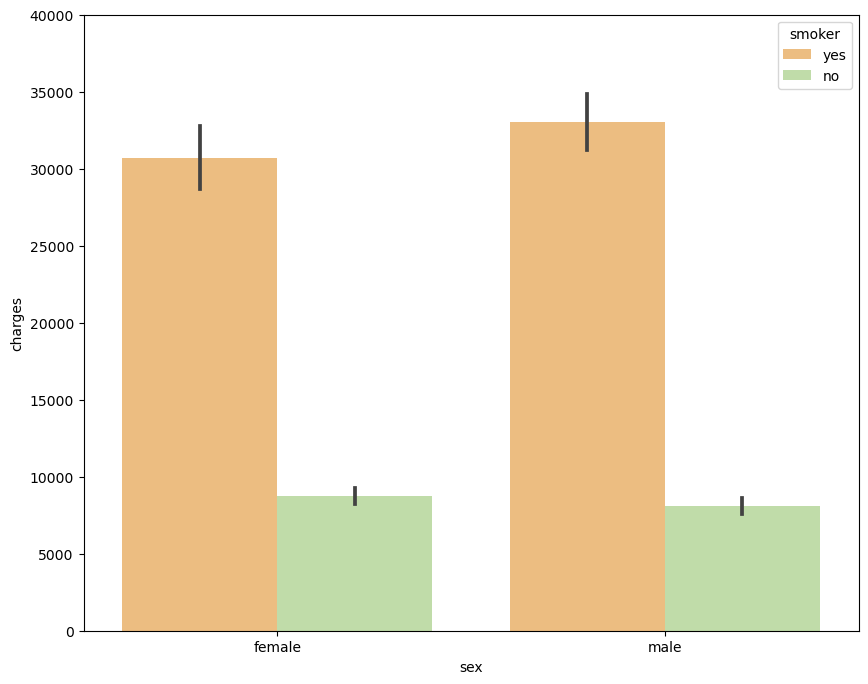

In [71]:
sns.barplot(x='sex', y='charges',hue='smoker' ,data=df, palette='Spectral')
plt.ylim(0,40000);


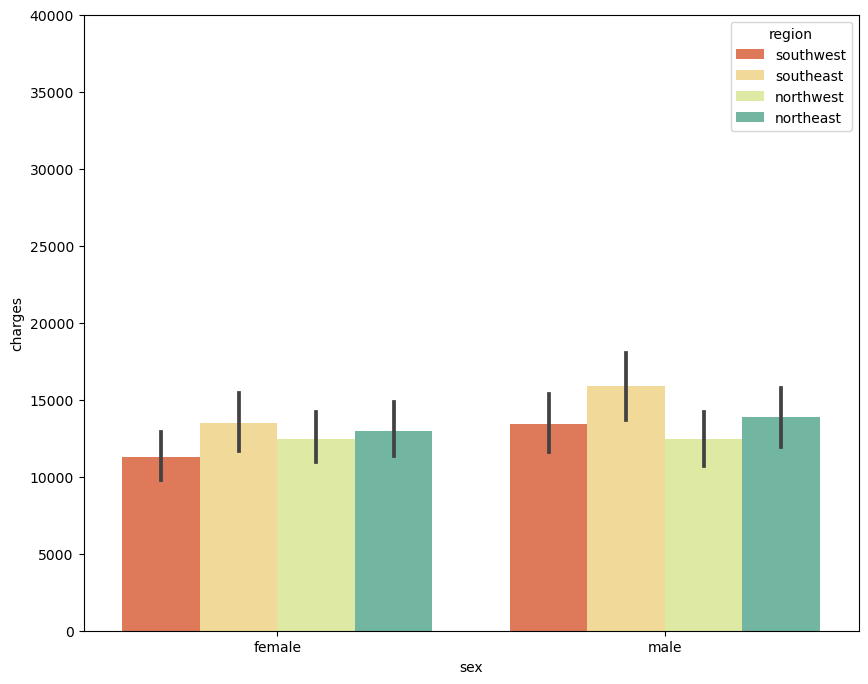

In [80]:
sns.barplot(x='sex', y='charges',hue='region', data=df, palette='Spectral')
plt.ylim(0,40000);

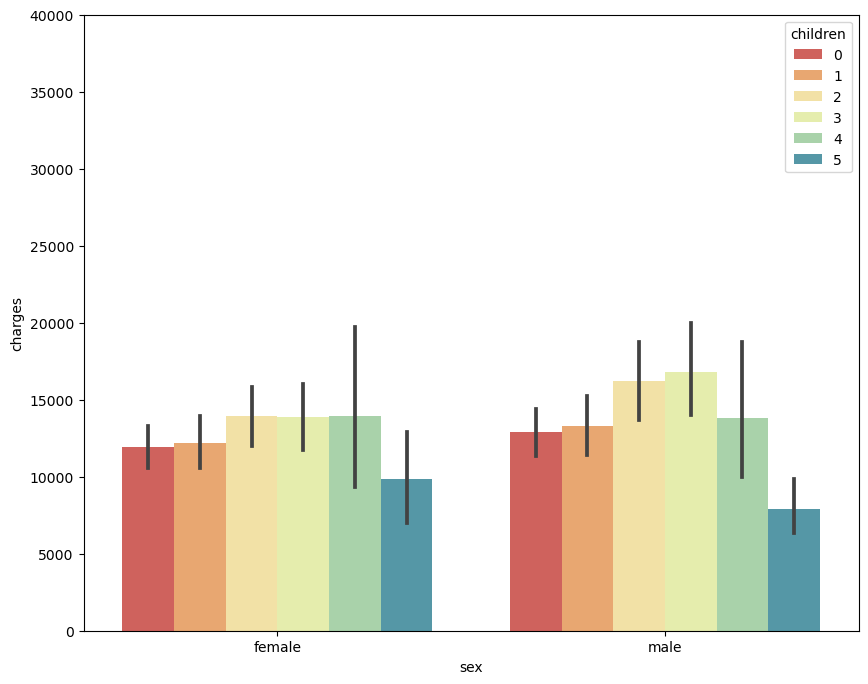

In [81]:
sns.barplot(x='sex', y='charges',hue='children' ,data=df, palette='Spectral')
plt.ylim(0,40000);

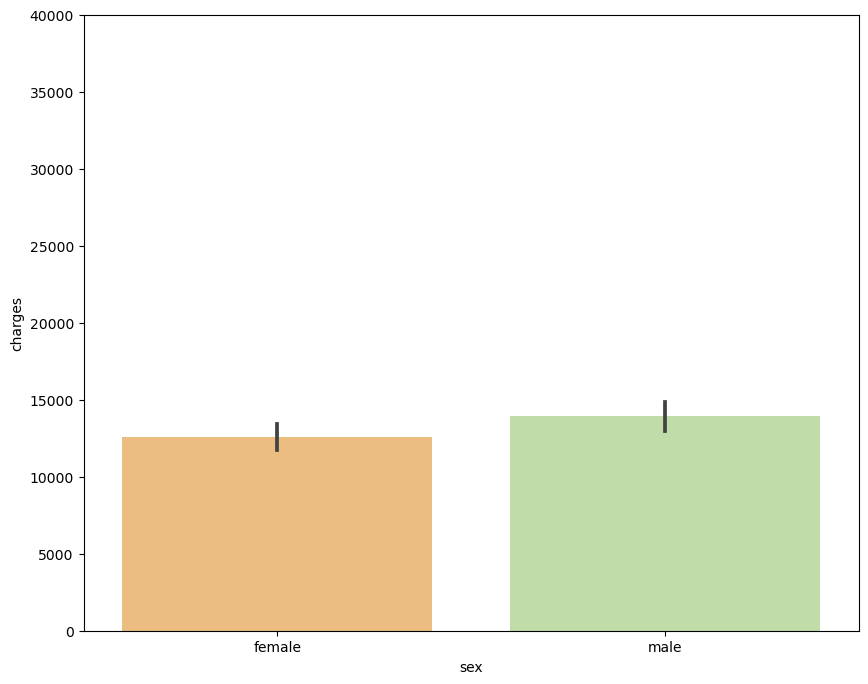

In [82]:
sns.barplot(x='sex', y='charges' ,data=df, palette='Spectral')
plt.ylim(0,40000);

Slight variation by region, but clear variation by smoking status

---

BMI <25

In [21]:
df_peso=df[df['bmi']<25]

In [23]:
df.shape

(1337, 7)

In [22]:
df_peso.shape #son un total de 245 registros sin sobrepeso

(245, 7)

In [26]:
df_peso.describe(include='all')#190 registros de fumadores y el 75% tienen primas de hasta 14572, 
#estarian casi todos dentro del grupo de primas bajas.

,age,sex,bmi,children,smoker,region,charges
count,245.000000,245,245.000000,245.000000,245,245,245.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,female,NaN,NaN,no,northeast,NaN
freq,NaN,129,NaN,NaN,190,83,NaN
mean,36.375510,NaN,22.203898,1.122449,NaN,NaN,10282.224474
std,13.606811,NaN,2.103806,1.238598,NaN,NaN,7520.485850
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,24.000000,NaN,20.800000,0.000000,NaN,NaN,3861.209650
50%,35.000000,NaN,22.705000,1.000000,NaN,NaN,8582.302300
75%,47.000000,NaN,23.900000,2.000000,NaN,NaN,14571.890800


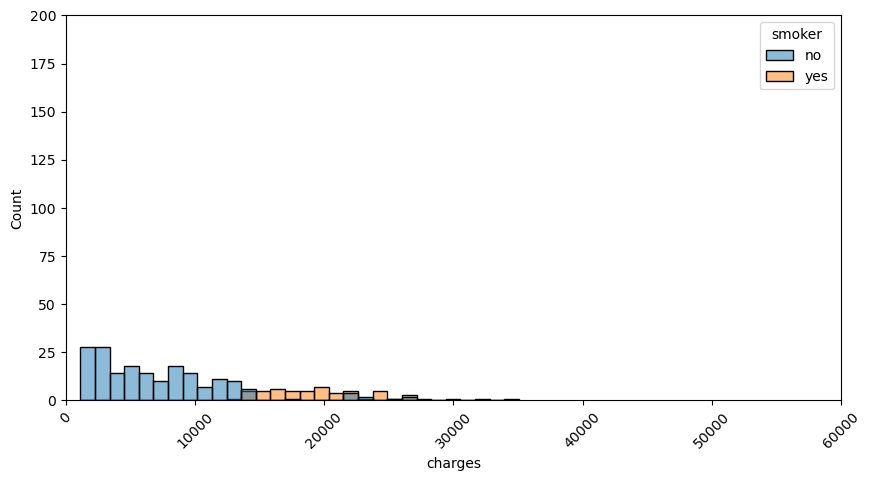

In [53]:
plt.figure(figsize = (10,5)) 
sns.histplot(data =df_peso, x = "charges", hue = "smoker",bins=30) 
plt.ylim(0,200)
plt.xlim(0,60000)
plt.xticks(rotation = 45);

In [36]:
df_peso_fumador=df_peso[(df_peso['smoker']=='yes')]

In [37]:
df_peso_fumador.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,55.000000,55,55.000000,55.000000,55,55,55.000000
unique,NaN,2,NaN,NaN,1,4,NaN
top,NaN,female,NaN,NaN,yes,northeast,NaN
freq,NaN,32,NaN,NaN,55,22,NaN
mean,37.309091,NaN,22.277182,1.236364,NaN,NaN,19839.278309
std,12.480908,NaN,2.182447,1.261446,NaN,NaN,4583.245438
min,18.000000,NaN,17.195000,0.000000,NaN,NaN,12829.455100
25%,27.500000,NaN,20.710000,0.000000,NaN,NaN,16499.137025
50%,38.000000,NaN,22.895000,1.000000,NaN,NaN,19361.998800
75%,45.500000,NaN,24.130000,2.000000,NaN,NaN,22049.467450


### Vamos a decidir si partir nuestro dataset en base a las variables predictoras que vemos que pueden condicionar nuestra distribución de datos de la variable respuesta, en nuestro caso, vamos a estudiar dividirlo según habitos tabaquicos o según edad.

## Para personas fumadoras

In [39]:
df1 = df[(df['smoker'] == 'yes')]
df1.sample(5)

,age,sex,bmi,children,smoker,region,charges
252,54,male,34.210,2,yes,southeast,44260.74990
1249,32,male,33.630,1,yes,northeast,37607.52770
949,25,male,29.700,3,yes,southwest,19933.45800
376,39,female,24.890,3,yes,northeast,21659.93010
854,49,female,23.845,3,yes,northeast,24106.91255


In [40]:
numericas1 = df1.select_dtypes(include = np.number)
numericas1.head(2)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
11,62,26.29,0,27808.7251


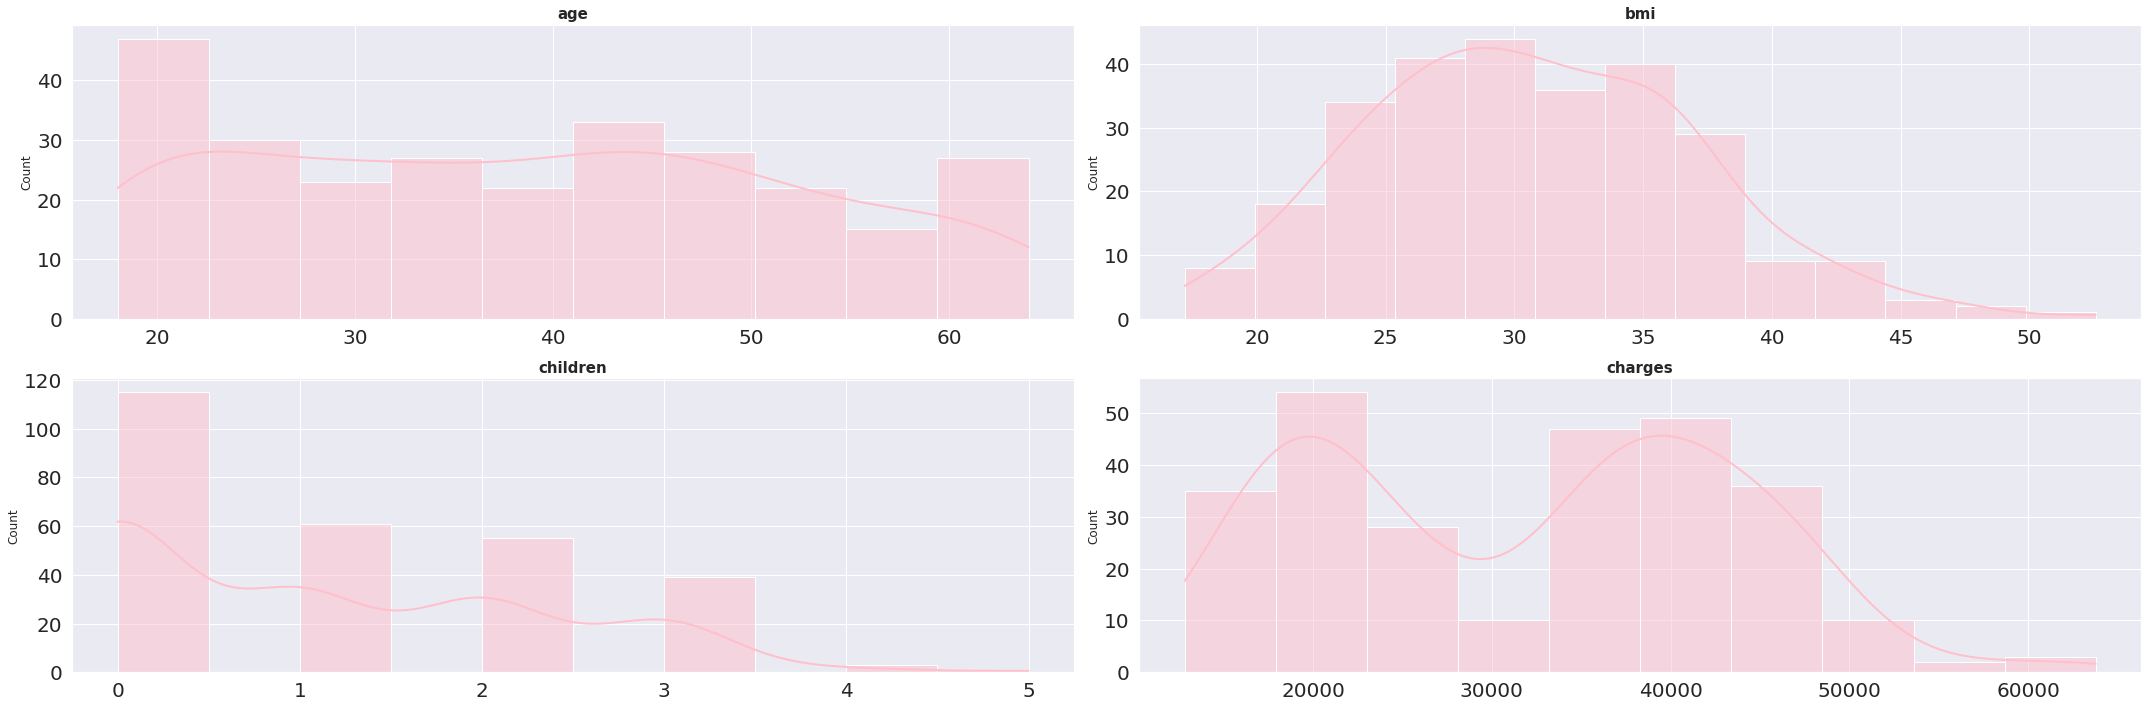

In [126]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))
axes = axes.flat#iterador
for i, colum in enumerate(numericas1.columns): 
    sns.histplot(
        data = numericas1[colum],
        kde = True,
        color = "pink", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
fig.tight_layout();

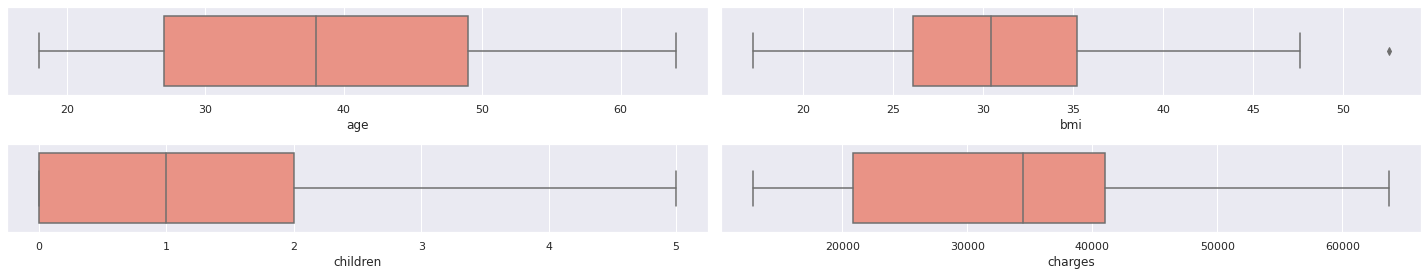

In [127]:
fig, axes = plt.subplots(2,2, figsize=(20,4))
axes = axes.flat
for indice, columna in enumerate(numericas1.columns):
    sns.boxplot(x = numericas1[columna], data = df1, ax=axes[indice], color = "#fa8775"); # para trazar una línea de densidad 
plt.tight_layout()
plt.show();

In [42]:
#quiero ver que pasa en el rango cargos mayoritarios para fumadores con y sin sobrepeso
df1_comp=df1[df1['charges']<=23000]

In [43]:
df1_comp.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,89.000000,89,89.000000,89.000000,89,89,89.000000
unique,NaN,2,NaN,NaN,1,4,NaN
top,NaN,male,NaN,NaN,yes,northeast,NaN
freq,NaN,47,NaN,NaN,89,28,NaN
mean,31.617978,NaN,24.937753,1.078652,NaN,NaN,18614.596308
std,9.725208,NaN,3.359965,1.198718,NaN,NaN,2376.916548
min,18.000000,NaN,17.195000,0.000000,NaN,NaN,12829.455100
25%,23.000000,NaN,22.420000,0.000000,NaN,NaN,17043.341400
50%,31.000000,NaN,25.270000,1.000000,NaN,NaN,18765.875450
75%,39.000000,NaN,27.940000,2.000000,NaN,NaN,20296.863450


In [ ]:
#con primas menores de 23000 son 83, sabemos que de estos 41 son de bmi normal, de bmi normal, quedan 14 de primas mayores.
#Voy a investigarlos

In [44]:
df1_peso_altas=df_peso_fumador[df_peso_fumador['charges']>=23000]

In [46]:
df1_peso_altas.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,12.000000,12,12.000000,12.000000,12,12,12.000000
unique,NaN,2,NaN,NaN,1,3,NaN
top,NaN,female,NaN,NaN,yes,southeast,NaN
freq,NaN,8,NaN,NaN,12,4,NaN
mean,49.500000,NaN,23.172083,1.250000,NaN,NaN,26543.534395
std,12.602309,NaN,1.839117,1.288057,NaN,NaN,3673.335465
min,20.000000,NaN,17.765000,0.000000,NaN,NaN,23244.790200
25%,48.000000,NaN,22.891250,0.000000,NaN,NaN,24072.030175
50%,52.000000,NaN,23.707500,1.000000,NaN,NaN,25276.081675
75%,54.500000,NaN,24.177500,2.250000,NaN,NaN,26954.364325


In [47]:
df1_peso_altas.head(12)

,age,sex,bmi,children,smoker,region,charges
58,53,female,22.880,1,yes,southeast,23244.79020
128,32,female,17.765,2,yes,northwest,32734.18630
262,52,male,24.320,3,yes,northeast,24869.83680
301,53,female,22.610,3,yes,northeast,24873.38490
607,59,female,23.655,0,yes,northwest,25678.77845
664,64,female,22.990,0,yes,southeast,27037.91410
854,49,female,23.845,3,yes,northeast,24106.91255
917,45,male,22.895,0,yes,northeast,35069.37452
966,51,male,24.795,2,yes,northwest,23967.38305
1176,52,female,24.130,1,yes,northwest,23887.66270


In [128]:
df1.shape #comprobamos el tamaño de nuestro nuevo posible dataset

(274, 7)

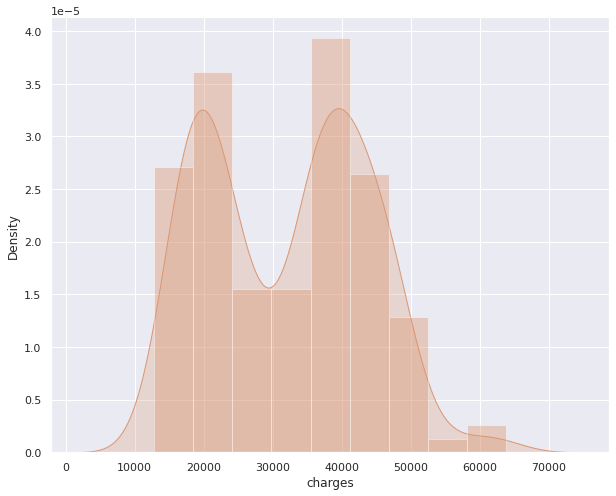

In [129]:
# vamos a ver visualmente como está distribuida la variable respuesta segun fumadores
sns.set(style="ticks")
sns.set_style("darkgrid")
sns.distplot(
    df1["charges"], 
    #hist = False, 
    color = "#db9671", 
    kde_kws = {"shade": True, "linewidth": 1});

---

## Personas NO fumadoras

In [130]:
df2 = df[(df['smoker'] == 'no')]
df2.sample(5)

,age,sex,bmi,children,smoker,region,charges
470,27,male,32.67,0,no,southeast,2497.0383
95,28,female,37.62,1,no,southeast,3766.8838
194,18,male,34.43,0,no,southeast,1137.4697
1061,57,male,27.94,1,no,southeast,11554.2236
6,46,female,33.44,1,no,southeast,8240.5896


In [131]:
df2.shape

(1063, 7)

In [132]:
numericas2 = df2.select_dtypes(include = np.number)

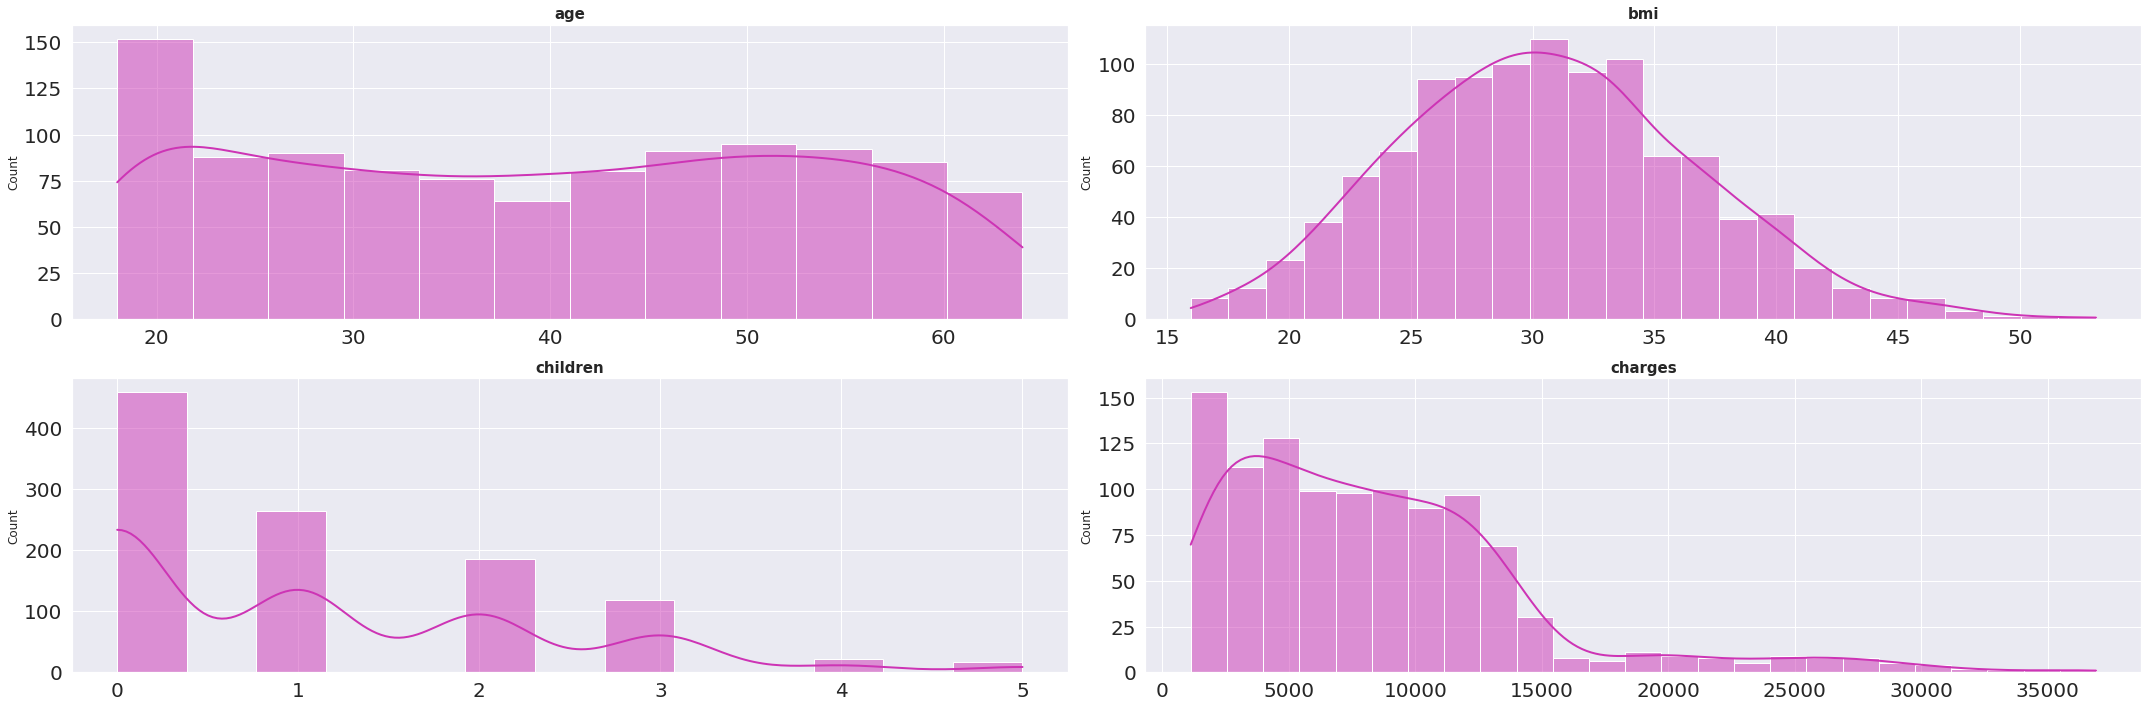

In [133]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))
axes = axes.flat#iterador
for i, colum in enumerate(numericas2.columns): 
    sns.histplot(
        data = numericas2[colum],
        kde = True,
        color = "#cd34b5", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
fig.tight_layout();

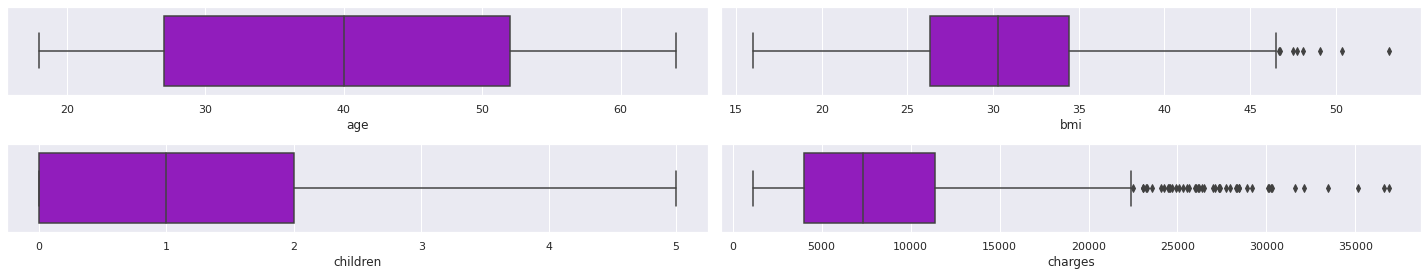

In [134]:
fig, axes = plt.subplots(2,2, figsize=(20,4))
axes = axes.flat
for indice, columna in enumerate(numericas2.columns):
    sns.boxplot(x = numericas2[columna], data = df2, ax=axes[indice], color = "#9d02d7");
plt.tight_layout()
plt.show();

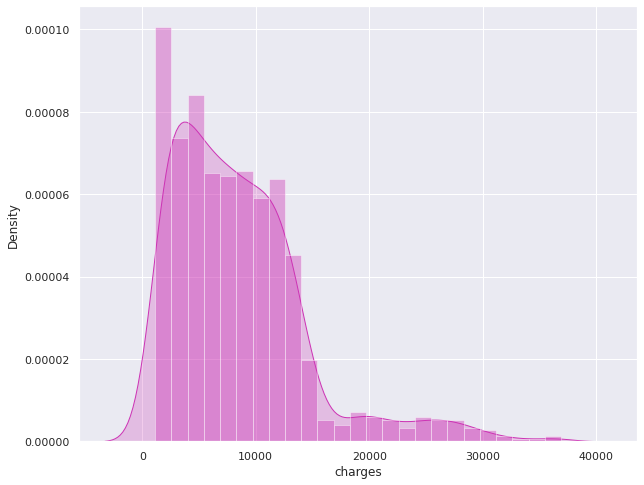

In [135]:
# vamos a ver visualmente como está distribuida la variable respuesta segun no fumadores
sns.set(style="ticks")
sns.set_style("darkgrid")
sns.distplot(
    df2["charges"], 
    #hist = False, 
    color = "#cd34b5", 
    kde_kws = {"shade": True, "linewidth": 1});

### Exploarmos según edad

<AxesSubplot:xlabel='age', ylabel='charges'>

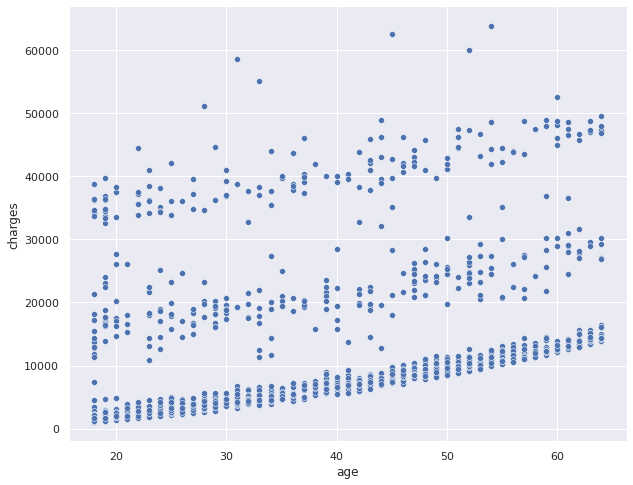

In [136]:
sns.scatterplot(y='charges', x='age', data=df)

Vemos, que hay tres lineas claras de distribución, que podrian identificar las tres 'chepas' de distribución de la variable respuesta, así que vamos a explorar dividiendo entre primas altas y bajas(en vez de las tres categorias que serían altas, medias y bajas que se justificarian con esta distribución segín edades). Ponemos el corte en 20000.

# Primas bajas

In [137]:
df3 = df[(df['charges']<20000)]
df3.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [138]:
numericas3 = df3.select_dtypes(np.number)
numericas3.head(2)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523


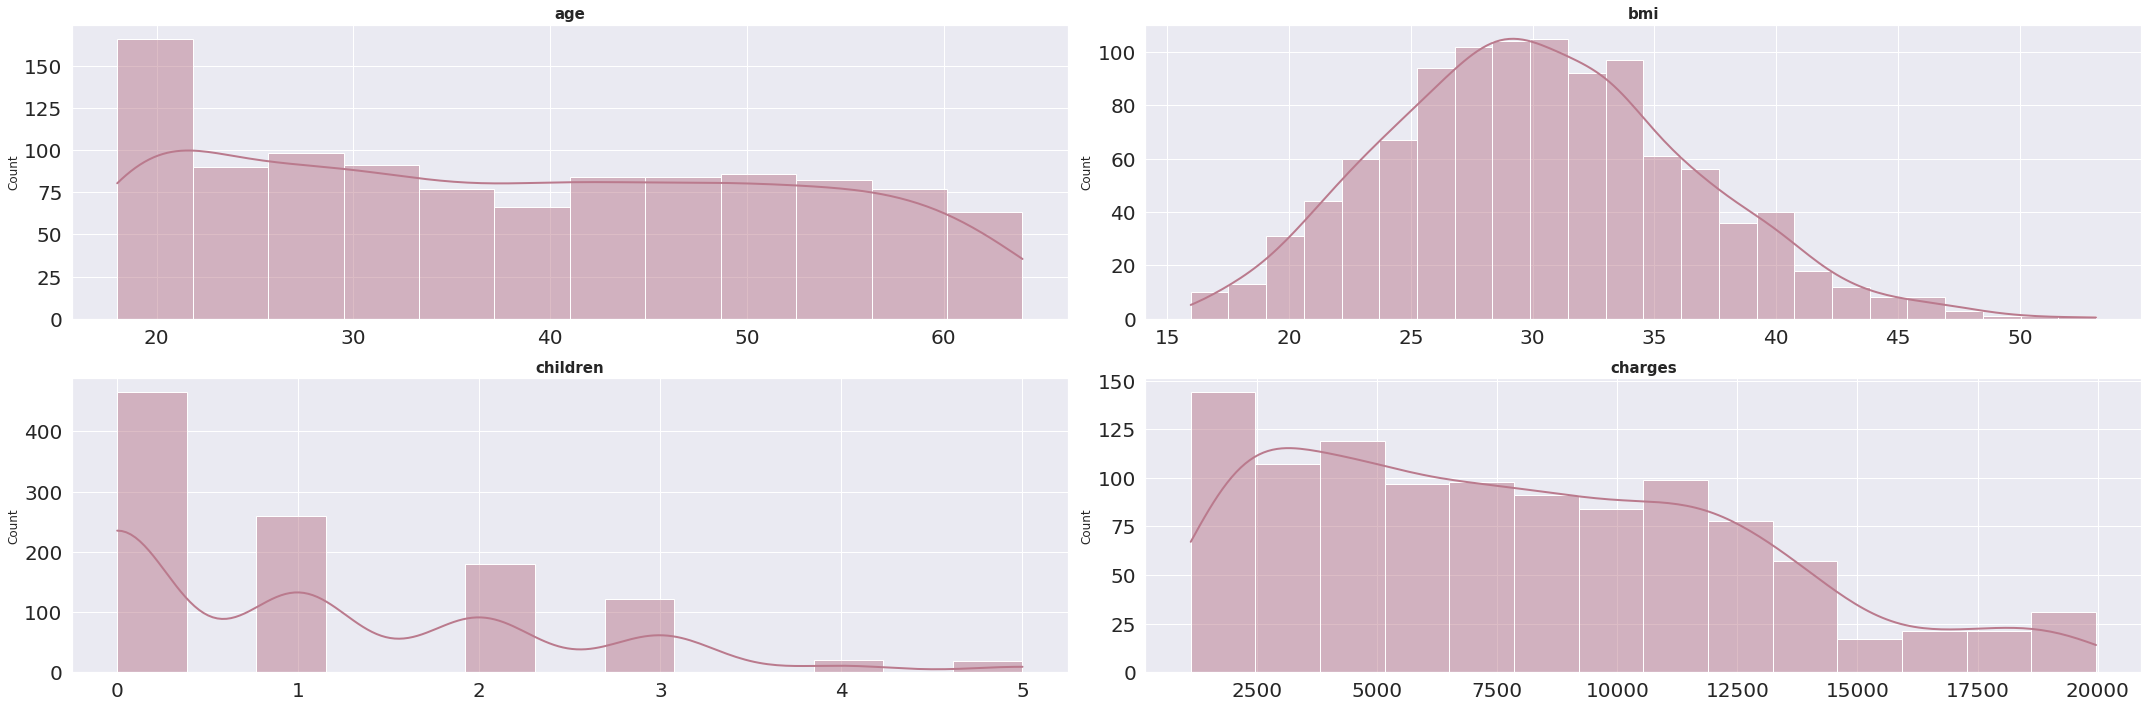

In [139]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))
axes = axes.flat#iterador
for i, colum in enumerate(numericas3.columns): 
    sns.histplot(
        data = numericas3[colum],
        kde = True,
        color = "#ba7a8d", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
fig.tight_layout();

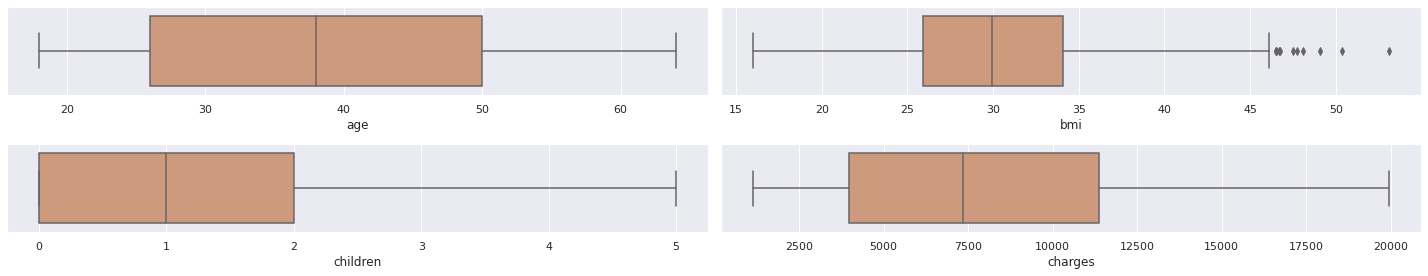

In [140]:
fig, axes = plt.subplots(2,2, figsize=(20,4))
axes = axes.flat
for indice, columna in enumerate(numericas3.columns):
    sns.boxplot(x = numericas3[columna], data = df3, ax=axes[indice], color = "#db9671")
plt.tight_layout()
plt.show();

In [141]:
df3.shape

(1064, 7)

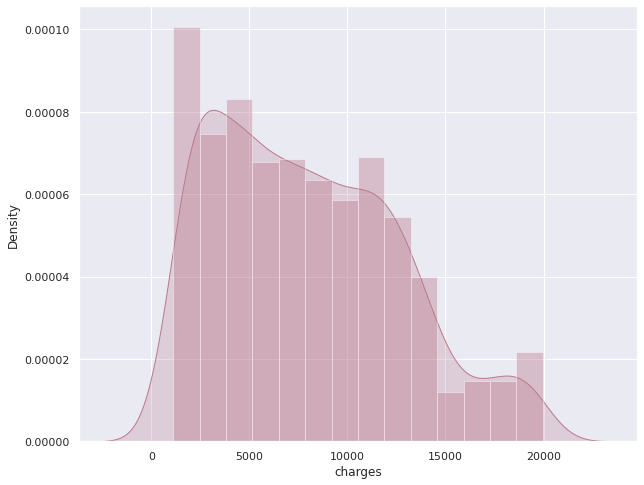

In [142]:
# vamos a ver visualmente como está distribuida la variable respuesta segun cargos bajos
sns.set(style="ticks")
sns.set_style("darkgrid")
sns.distplot(
    df3["charges"], 
    #hist = False, 
    color = "#ba7a8d", 
    kde_kws = {"shade": True, "linewidth": 1});

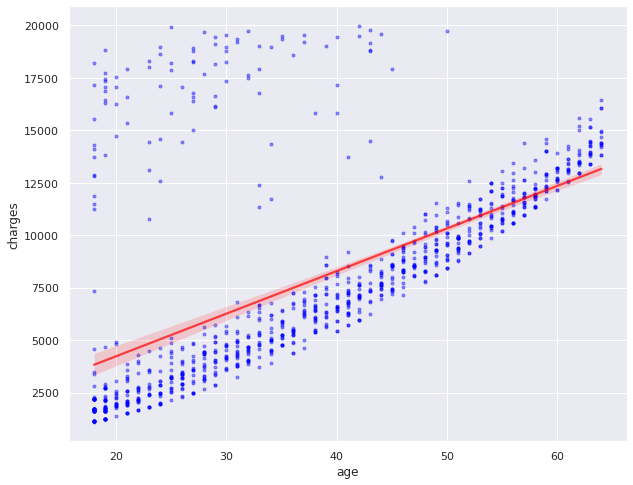

In [143]:
sns.regplot(
        x = df3['age'], 
        y = df3["charges"], 
        color = "blue", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 } );

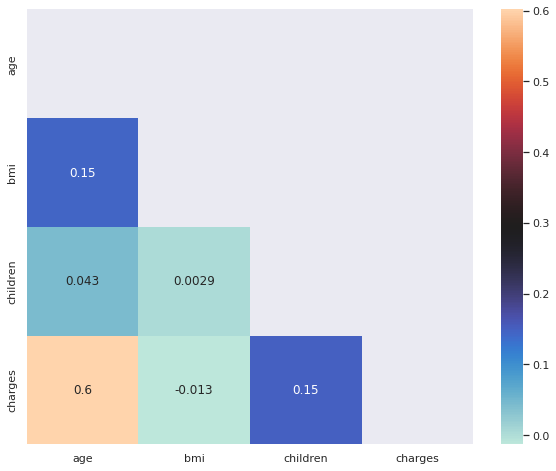

In [144]:
mask = np.triu(np.ones_like(df3.corr(), dtype = np.bool))
sns.heatmap(df3.corr(), 
           cmap = "icefire", 
            mask = mask,
           annot = True);

---

# Primas altas

In [145]:
df4 = df[(df['charges']>=20000)]
df4.head(2)

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
9,60,female,25.840,0,no,northwest,28923.13692


In [146]:
numericas4=df4.select_dtypes(np.number)

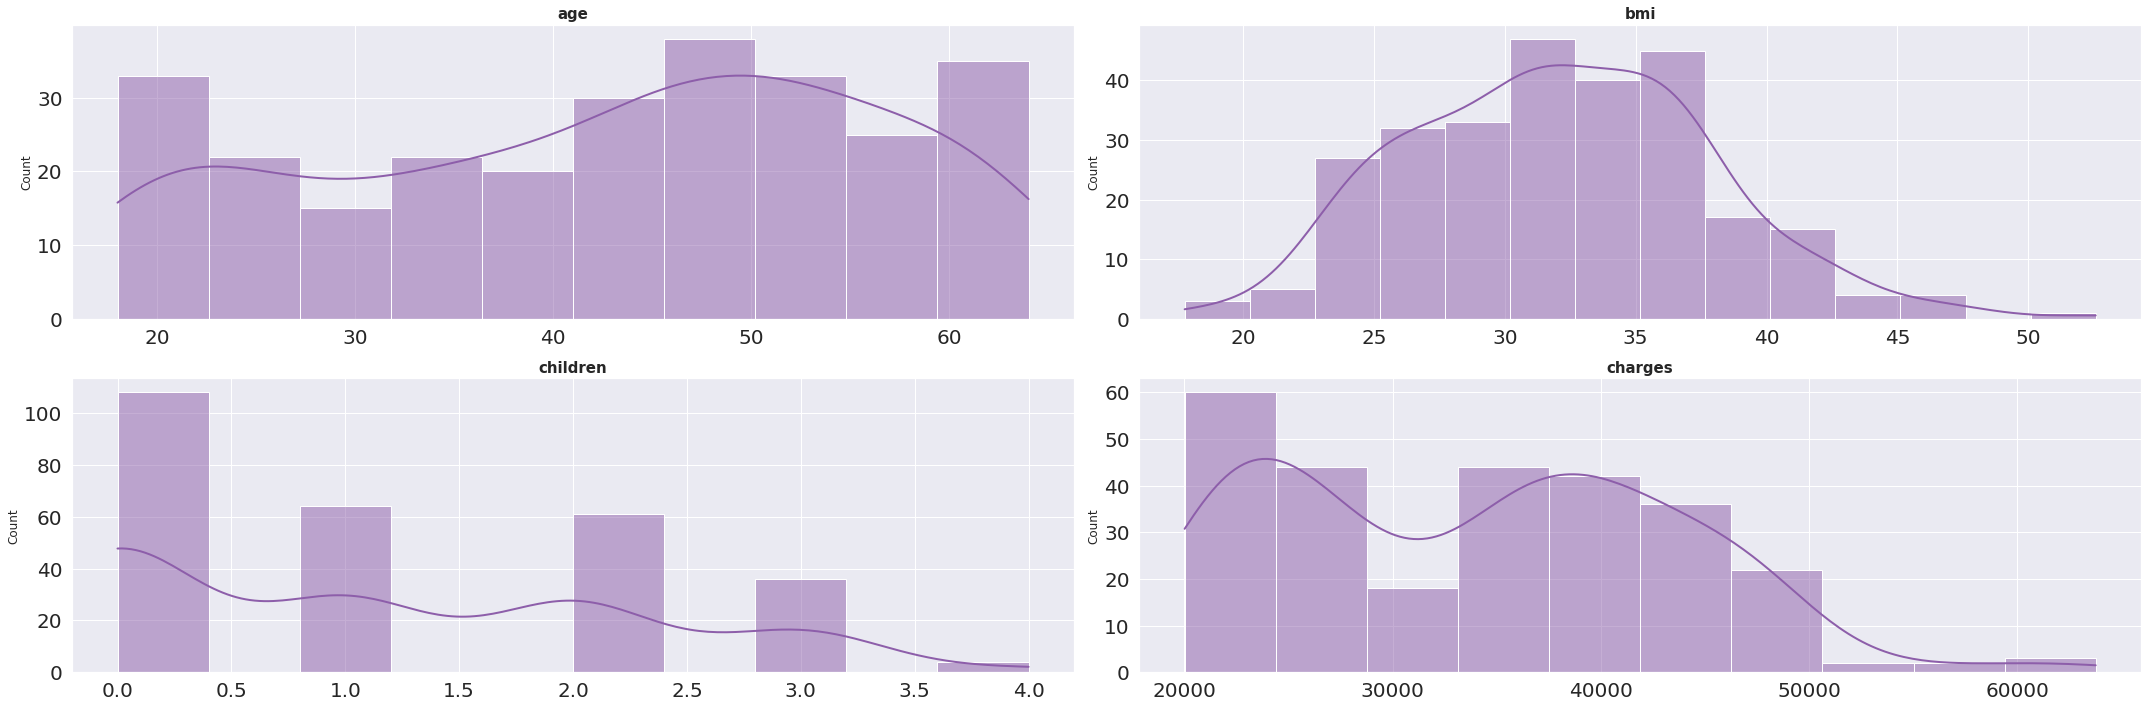

In [147]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))
axes = axes.flat#iterador
for i, colum in enumerate(numericas4.columns): 
    sns.histplot(
        data = numericas4[colum],
        kde = True,
        color = '#8d5eaa', 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
fig.tight_layout();

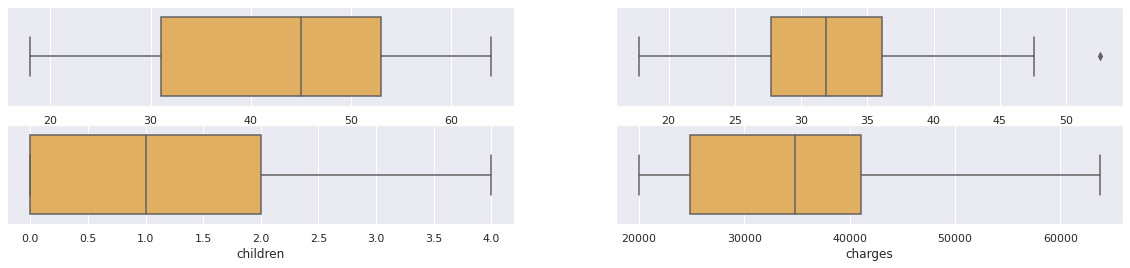

In [148]:
fig, axes = plt.subplots(2,2, figsize=(20,4))
axes = axes.flat
for indice, columna in enumerate(numericas4.columns):
    sns.boxplot(x = numericas4[columna], data = df4, ax=axes[indice], color = '#f6b44d')
plt.show();

In [149]:
df4.shape

(273, 7)

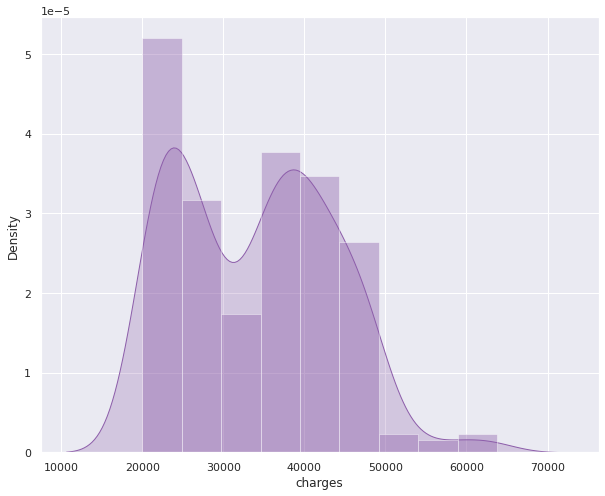

In [150]:
# vamos a ver visualmente como está distribuida la variable respuesta segun cargos altos
sns.set(style="ticks")
sns.set_style("darkgrid")
sns.distplot(
    df4["charges"], 
    #hist = False, 
    color = '#8d5eaa', 
    kde_kws = {"shade": True, "linewidth": 1});

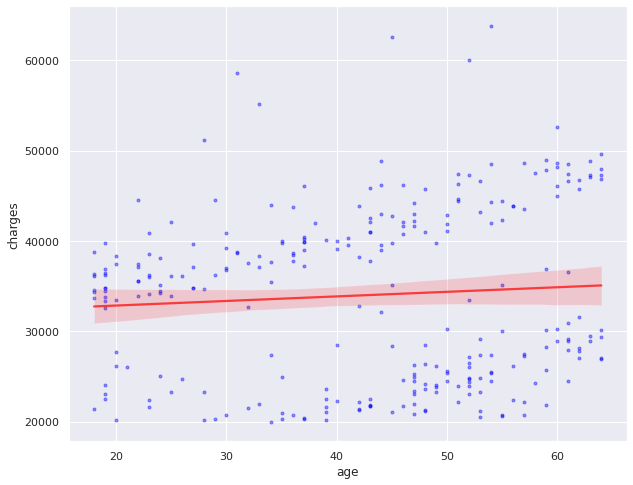

In [151]:
sns.regplot(
        x = df4['age'], 
        y = df4["charges"], 
        color = "blue", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 });

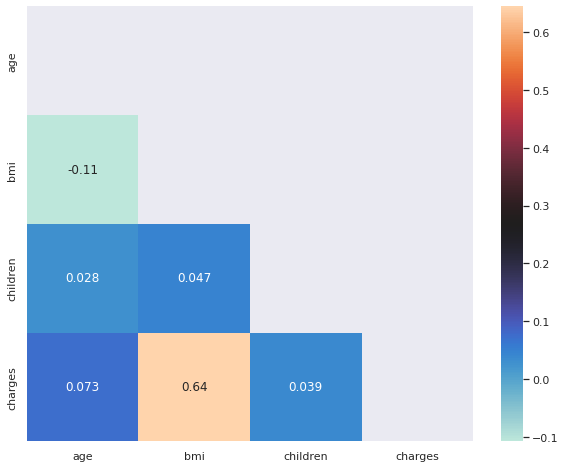

In [152]:
mask = np.triu(np.ones_like(df4.corr(), dtype = np.bool))
sns.heatmap(df4.corr(), 
           cmap = "icefire", 
            mask = mask,
           annot = True);

## Vemos que en las primas bajas existe relación con la edad, pero, que en primas altas, no, asi que vamos a estudiar que otras variables pueden estar afectando a las primas altas.

Primas altas para fumadores

In [54]:
plt.figure(figsize = (10,5)) 
sns.histplot(data =df4, x = "charges", hue = "smoker") 
plt.ylim(0,200)
plt.xlim(0,60000)
plt.xticks(rotation = 45);

NameError: name 'df4' is not defined

<Figure size 1000x500 with 0 Axes>

Primas bajas para fumadores

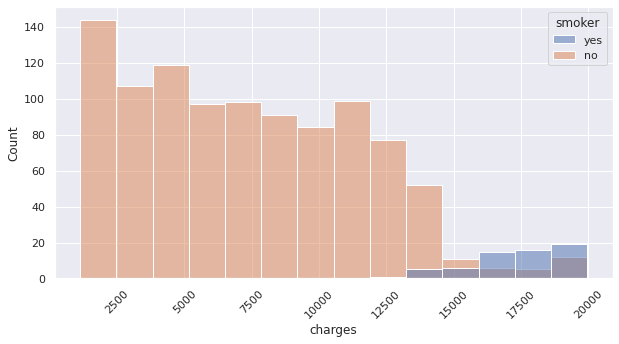

In [154]:
plt.figure(figsize = (10,5)) 
sns.histplot(data =df3, x = "charges", hue = "smoker") 
plt.ylim(0,200)
plt.xlim(0,60000)
plt.xticks(rotation = 45);

fumadores para el df general

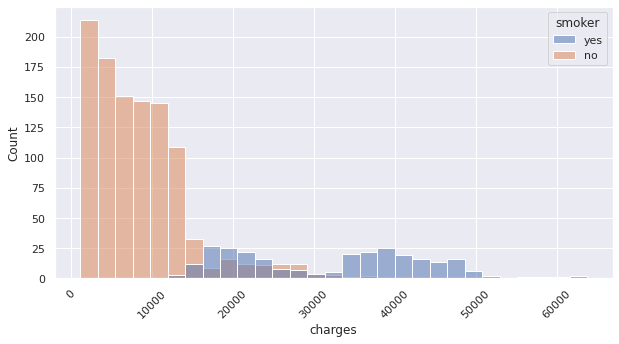

In [155]:
plt.figure(figsize = (10,5))  # establecemos el tamaño de la gráfica
sns.histplot(data =df, x = "charges", hue = "smoker") 
plt.xticks(rotation = 45);

In [156]:
df3['smoker'].value_counts()

no     1002
yes      62
Name: smoker, dtype: int64

In [157]:
df4['smoker'].value_counts()

yes    212
no      61
Name: smoker, dtype: int64

In [158]:
df3.shape

(1064, 7)

In [159]:
df4.shape

(273, 7)

In [160]:
w=df3['charges'].mean()

In [161]:
df3.shape[0]*w

8476250.48524899

In [162]:
c=df4['charges'].mean()

In [163]:
df4.shape[0]*c

9277934.94241

---

        Partimos de datos poblacionales con problemas de sobrepeso, incluye menos de 25% de los registros con BMI 
        inferiores a 25.Analizando las pólizas correspondientes a BMI saludables, están incluidos en más del 75% de los casos dentro de primas bajas, sean fumadores, o no. Tenemos dos dataframes resultantes de las dos jorobas de 'charges',la de primas bajas mas relacionada con edades, y la de altas, relacionada con hábitos tabaquicos.

>Segun la muestra, económicamente, son similares para la compañia pero con n muy dispares,
 >optamos por quedarnos con las primas bajas, con una n más alta, 
 >y relacionar dos variables numéricas, edad y prima. Ya que el tiempo de pair, es limitado.


> Gráficamente vemos claramente que las primas altas, se relacionan más con el hábito tabaquico si y edades altas, y las primas bajas, a penas tienen representacion de ese grupo.

> Calculando media de primas y numero de registros, el impacto economico de ambos grupos en los que hemos dividido la muestra es bastante similar.

# Gestión de Outliers de nuestro dataset 'Primas bajas'

In [164]:
numericas3=df3.select_dtypes(np.number)
numericas3

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523
2,28,33.00,3,4449.4620
4,32,28.88,0,3866.8552
5,31,25.74,0,3756.6216
...,...,...,...,...
1332,52,44.70,3,11411.6850
1333,50,30.97,3,10600.5483
1334,18,31.92,0,2205.9808
1335,18,36.85,0,1629.8335


In [165]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   smoker    1064 non-null   object 
 5   region    1064 non-null   object 
 6   charges   1064 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.5+ KB


In [166]:
numericas3=df3.drop('charges', axis=1)
numericas3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1336
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   smoker    1064 non-null   object 
 5   region    1064 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 58.2+ KB


In [167]:
numericas3_bis=numericas3.select_dtypes(np.number)
numericas3_bis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1336
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   bmi       1064 non-null   float64
 2   children  1064 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 33.2 KB


In [168]:
def detectar_outliers(lista_columnas, dataframe): 
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        # calculamos los límites
        outlier_step = 1.5 * IQR
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
    
    return dicc_indices 

In [169]:
lista_columnas3 = list(numericas3_bis.columns)
ind3 = detectar_outliers(lista_columnas3, numericas3)

In [170]:
ind3.keys()

dict_keys(['bmi'])

In [171]:
# Iteramos por el diccionario que hemos creado con los índices de los outliers
for k, v in ind3.items():
    # Sacamos la mediana de cada columna numérica
    mediana = df3[k].median()
    # iteramos por cada fila de la columna en la que hay outliers y convertimos ese valor en la mediana
    for i in v:
        df3.loc[i,k] = mediana

In [172]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   smoker    1064 non-null   object 
 5   region    1064 non-null   object 
 6   charges   1064 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 98.8+ KB


# Guardamos los nuevos archivos con las divisiones

In [173]:
df1.to_csv("../data/01-dataframe_fumadores.csv" )

In [174]:
df2.to_csv("../data/02-dataframe_no_fumadores.csv" )

In [175]:
df3.to_csv("../data/03-primas_bajas.csv" )

In [176]:
df4.to_csv("../data/04-primas_altas.csv" )